# Importing the Libraries

The first thing we need to do is import the libraries we will be using in this project. To visualize our data, we will be using matplotlib and seaborn to create heatmaps and a scatter matrix. To build our model, we will be using the statsmodel library, and the evaluation will be taking place with both the statsmodels and the sklearn library. We've also added a few additional modules to help calculate certain metrics.

In [389]:
import json

import numpy as np
import math
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as seabornInstance 

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline

# Loading the Data into Pandas (Dataframe Library)

After we've loaded our libraries, we can begin the process of importing and exploring our data. We were provided with 3 .csv files, but we will only use 2 - train.csv and validation.csv. The first one contains 5000 observations of the dependent variable 'shares' and all the 59 independent variables gathered (this is the data we will be using to train our regression models). The second file provides the independent variables data necessary to predict 1000 observations.

From here, we will set the index of our data frames to the 'id' column. The reasoning behind this is because it will make selecting the data easier. We will drop the 'url' column because it has no interest for training the model.   After we've defined the index, we convert the entire data frame to a float data type to assure correct calculations.

We will create 4 data frames:
train_df: stores the training data of train.csv
validation_df: stores the predictors data of validation.csv
regressions_df: loaded from a previously created .csv file that stores all out regression models
predictions_df: loaded from a previously created .csv file that stores all out predictions for the validation data

In [390]:
def loadDataframe(fileName, numbRows):
    # load .csv data into a dataframe (df) and make sure only important rows stay
    df = pd.read_csv(fileName)
    df = df[:numbRows]
    #remove column white space
    df.columns = df.columns.str.replace(' ', '')
    #drop url column (it doesn't matter for us)
    if 'url' in df.columns:
        df.drop('url', axis=1, inplace=True)
    # set the dataframe index to the id column
    if 'id' in df.columns:
        df = df.set_index('id')
    # Make sure all data is float
    df = df.astype(float)
    
    return df

# Retrieve Dataframes
train_df = loadDataframe('train.csv', 5000)
predictions_df = loadDataframe('predictions_df.csv', 1000)
regressions_df = pd.read_csv('regressions_df.csv', index_col = 'model')
validation_df = loadDataframe('validation.csv', 1000)
validation_df.drop('shares', axis=1, inplace=True)

# Retrieve regression json
with open('regressions.json') as json_file:
    regressions = json.load(json_file)

# set dataframes to display all columns
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', -1)

train_df

/Users/diogovalentepcs/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
id                                                                     
1.0     198.0      6.0             47.0              0.914894          
2.0     660.0      7.0             181.0             0.519337          
3.0     552.0      9.0             862.0             0.465089          
4.0     559.0      10.0            1015.0            0.447503          
5.0     573.0      8.0             129.0             0.666667          
6.0     149.0      9.0             0.0               0.000000          
7.0     702.0      8.0             234.0             0.595652          
8.0     111.0      10.0            437.0             0.527907          
9.0     709.0      10.0            289.0             0.614035          
10.0    188.0      11.0            154.0             0.678322          
11.0    542.0      5.0             515.0             0.459794          
12.0    79.0       6.0             303.0             0.592593          
13.0    594.0      7.0             148.0             0.673469          
14.0    443.0      7.0             407.0             0.433333          
15.0    540.0      13.0            100.0             0.770000          
16.0    539.0      11.0            1088.0            0.505304          
17.0    121.0      9.0             734.0             0.446903          
18.0    517.0      8.0             353.0             0.550432          
19.0    541.0      5.0             914.0             0.463576          
20.0    113.0      11.0            1427.0            0.375706          
21.0    238.0      11.0            338.0             0.614679          
22.0    100.0      13.0            259.0             0.609562          
23.0    22.0       10.0            367.0             0.584270          
24.0    298.0      12.0            1521.0            0.347383          
25.0    695.0      9.0             242.0             0.660714          
26.0    105.0      11.0            242.0             0.601810          
27.0    542.0      14.0            594.0             0.474576          
28.0    113.0      13.0            0.0               0.000000          
29.0    127.0      15.0            557.0             0.530841          
30.0    199.0      12.0            136.0             0.768657          
...       ...       ...              ...                  ...          
4971.0  308.0      8.0             358.0             0.581006          
4972.0  479.0      11.0            539.0             0.528090          
4973.0  93.0       11.0            1124.0            0.394643          
4974.0  207.0      8.0             1110.0            0.457987          
4975.0  161.0      12.0            367.0             0.601648          
4976.0  645.0      9.0             589.0             0.476844          
4977.0  428.0      9.0             854.0             0.490012          
4978.0  729.0      11.0            173.0             0.723529          
4979.0  24.0       8.0             2776.0            0.312861          
4980.0  65.0       17.0            103.0             0.728155          
4981.0  564.0      10.0            870.0             0.504046          
4982.0  35.0       12.0            1580.0            0.463720          
4983.0  446.0      12.0            212.0             0.625616          
4984.0  282.0      10.0            144.0             0.636364          
4985.0  250.0      14.0            783.0             0.435006          
4986.0  93.0       10.0            516.0             0.547475          
4987.0  426.0      7.0             407.0             0.560000          
4988.0  102.0      10.0            330.0             0.561350          
4989.0  371.0      13.0            137.0             0.742647          
4990.0  332.0      8.0             612.0             0.490164          
4991.0  142.0      14.0            0.0               0.000000          
4992.0  471.0      8.0             279.0             0.582734          
4993.0  199.0      12.0            390.0        

# Filtering the Data with Linear Regression Assumptions

### Checking for Multicolineriaty

One of the first things we can do after loading our data is to validate one of the assumptions of our model; in this case, we will be checking for multicollinearity. One of the assumptions of our model is that there isn't any Perfect multicollinearity. Multicollinearity is where one of the explanatory variables is highly correlated with another explanatory variable. In essence, one of the X variables is almost perfectly correlated with another or multiple X variables.

Below we plot the correlation matrix and a heatmap that shoes the variables with highest correlation.

In [391]:
# calculate the correlation matrix
corr = train_df.corr()

# display the correlation matrix
display(corr)

timedelta  n_tokens_title  n_tokens_content  \
timedelta                      1.000000  -0.243861       -0.062606           
n_tokens_title                -0.243861   1.000000        0.016624           
n_tokens_content              -0.062606   0.016624        1.000000           
n_unique_tokens               -0.011415  -0.010082        0.025534           
n_non_stop_words              -0.012354  -0.009861        0.033500           
n_non_stop_unique_tokens      -0.011096  -0.010093        0.027342           
num_hrefs                      0.001155  -0.044708        0.453081           
num_self_hrefs                 0.084135  -0.005632        0.319458           
num_imgs                      -0.001696  -0.020840        0.365091           
num_videos                    -0.002302   0.070137        0.085006           
average_token_length           0.139347  -0.077376        0.177912           
num_keywords                   0.049123   0.013567        0.087727           
data_channel_is_lifestyle      0.073851  -0.063675        0.042877           
data_channel_is_entertainment -0.056924   0.143992        0.056494           
data_channel_is_bus            0.059449  -0.037195       -0.020974           
data_channel_is_socmed         0.067716  -0.094391        0.035741           
data_channel_is_tech           0.084291  -0.037074        0.038588           
data_channel_is_world         -0.169721   0.044960        0.065606           
kw_min_min                     0.592796  -0.111593       -0.052682           
kw_max_min                     0.053658  -0.006361        0.005217           
kw_avg_min                     0.187519  -0.039873       -0.000839           
kw_min_max                    -0.093037   0.004555       -0.028123           
kw_max_max                    -0.641035   0.124062        0.060417           
kw_avg_max                    -0.505892   0.114790       -0.115268           
kw_min_avg                    -0.171088  -0.010765       -0.029881           
kw_max_avg                    -0.056568   0.011405       -0.048522           
kw_avg_avg                    -0.175863   0.000996       -0.101057           
self_reference_min_shares     -0.032486  -0.016239       -0.027554           
self_reference_max_shares     -0.029940   0.019554        0.008892           
self_reference_avg_sharess    -0.035886   0.006658       -0.020454           
weekday_is_monday              0.007925   0.000763       -0.006534           
weekday_is_tuesday            -0.022480   0.006224       -0.000232           
weekday_is_wednesday           0.001402   0.011365       -0.024090           
weekday_is_thursday            0.007744  -0.019434       -0.007859           
weekday_is_friday              0.002065  -0.007648       -0.011274           
weekday_is_saturday           -0.020008  -0.017650        0.052729           
weekday_is_sunday              0.024860   0.030070        0.023770           
is_weekend                     0.003836   0.009406        0.055945           
LDA_00                         0.083775  -0.082722        0.013160           
LDA_01                         0.014188   0.066882       -0.009765           
LDA_02                        -0.140516   0.042068        0.086241           
LDA_03                        -0.046638   0.048605       -0.156419           
LDA_04                         0.097435  -0.062409        0.065851           
global_subjectivity            0.151879  -0.055111        0.133345           
global_sentiment_polarity      0.152291  -0.063163        0.022357           
global_rate_positive_words     0.206725  -0.074218        0.129404           
global_rate_negative_words     0.019191   0.014770        0.121222           
rate_positive_words            0.204920  -0.073556        0.102779           
rate_negative_words           -0.057985   0.028194        0.104934           
avg_positive_polarity          0.135051  -0.046673        0.130090           
min_positive_polarity          0.078065  -0.042524   

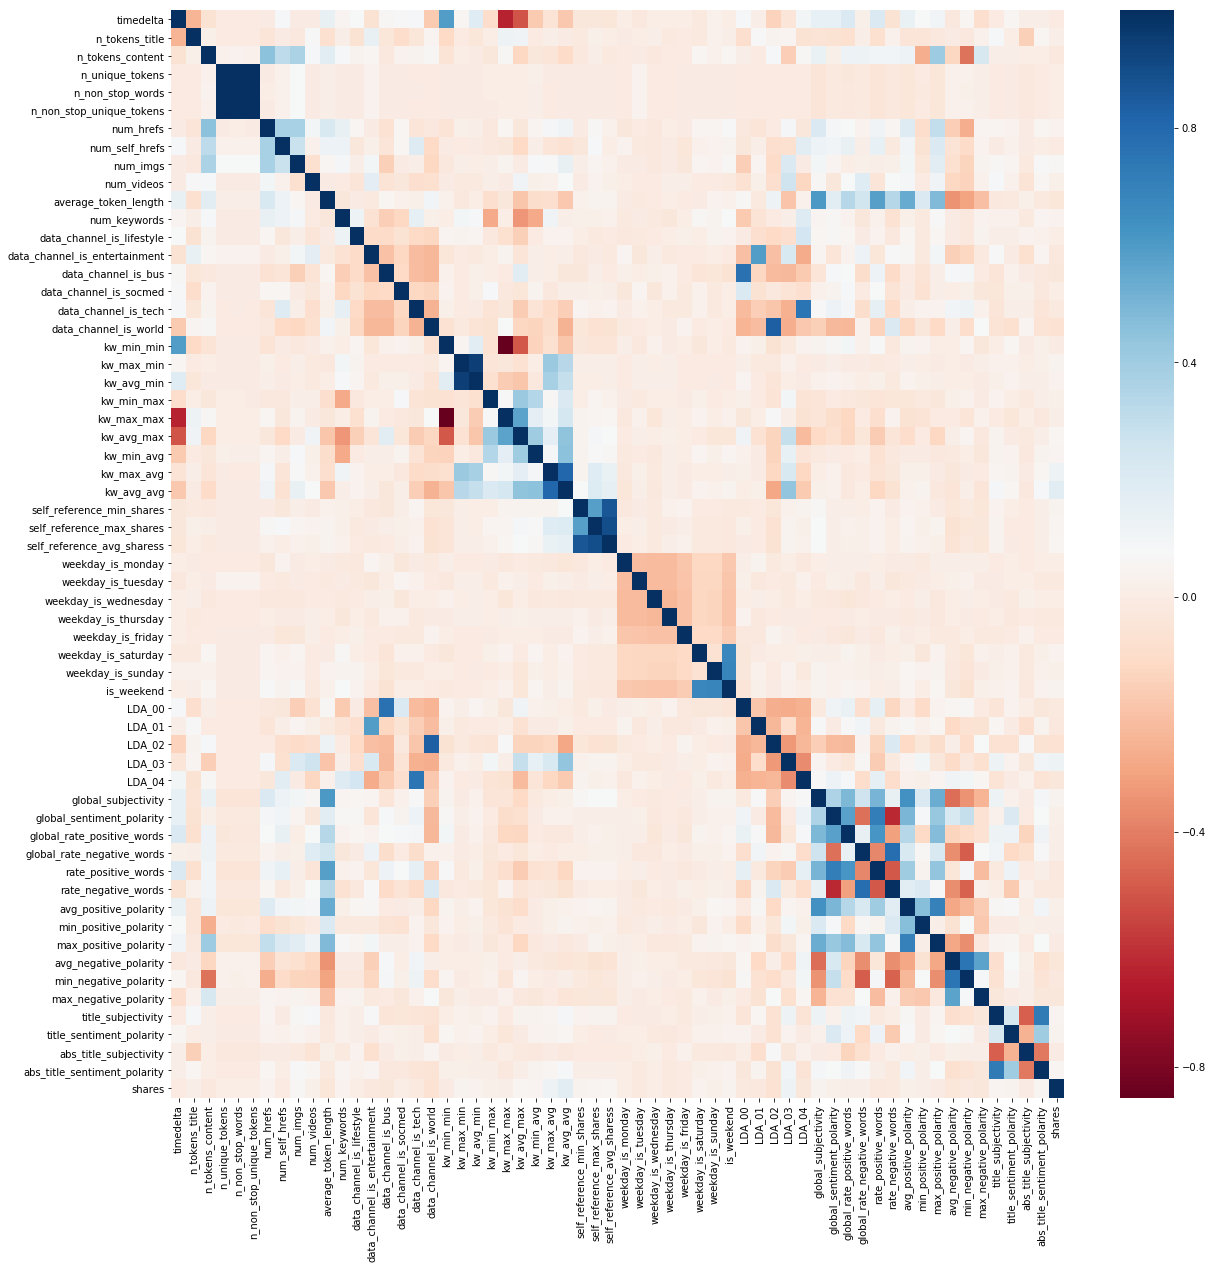

In [392]:
# plot the correlation heatmap
plt.figure(figsize = (20,20))
display(sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu'))

To filter the data and remove the variables, we defined the following criteria:
We remove a variable (x1) if it has a correlation higher than 0.7 with another variable (x2) and if x1 has lower correlation with the depedent variable 'shares' than x2.

We did this because we want the independent variables to have random relationships between them, for them to really be 'independent', but, on the other hand, we want to have a nice linear relationship between the independent variables and the dependent variables.

This way we were able to remove 14 variables (this process was done in excel), that were the following:

 n_non_stop_words	
 n_non_stop_unique_tokens	
 data_channel_is_tech	
 kw_min_min	
 kw_max_avg	
 self_reference_min_shares	
 self_reference_max_shares	
 LDA_00	
 LDA_02	
 global_sentiment_polarity	
 global_rate_negative_words	
 min_negative_polarity	
 title_sentiment_polarity	
 max_positive_polarity	

The remaining variables are:

 timedelta
 n_tokens_title
 n_tokens_content
 n_unique_tokens
 num_hrefs
 num_self_hrefs
 num_imgs
 num_videos
 average_token_length
 num_keywords
 data_channel_is_lifestyle
 data_channel_is_entertainment
 data_channel_is_bus
 data_channel_is_socmed
 data_channel_is_world
 kw_max_min
 kw_avg_min
 kw_min_max
 kw_max_max
 kw_avg_max
 kw_min_avg
 kw_avg_avg
 self_reference_avg_sharess
 weekday_is_monday
 weekday_is_tuesday
 weekday_is_wednesday
 weekday_is_thursday
 weekday_is_friday
 weekday_is_saturday
 weekday_is_sunday
 is_weekend
 LDA_01
 LDA_03
 LDA_04
 global_subjectivity
 global_rate_positive_words
 rate_positive_words
 rate_negative_words
 avg_positive_polarity
 min_positive_polarity
 max_positive_polarity
 avg_negative_polarity
 max_negative_polarity
 title_subjectivity
 abs_title_subjectivity
 abs_title_sentiment_polarity

In [393]:
removed_variables = ['n_non_stop_words', 'n_non_stop_unique_tokens', 'data_channel_is_tech', 'kw_min_min', 'kw_max_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'LDA_00', 'LDA_02', 'global_sentiment_polarity', 'global_rate_negative_words', 'min_negative_polarity', 'title_sentiment_polarity', 'max_positive_polarity']
filtered_train_df =  train_df.drop(removed_variables, axis = 1)
filtered_train_df


timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
id                                                                     
1.0     198.0      6.0             47.0              0.914894          
2.0     660.0      7.0             181.0             0.519337          
3.0     552.0      9.0             862.0             0.465089          
4.0     559.0      10.0            1015.0            0.447503          
5.0     573.0      8.0             129.0             0.666667          
6.0     149.0      9.0             0.0               0.000000          
7.0     702.0      8.0             234.0             0.595652          
8.0     111.0      10.0            437.0             0.527907          
9.0     709.0      10.0            289.0             0.614035          
10.0    188.0      11.0            154.0             0.678322          
11.0    542.0      5.0             515.0             0.459794          
12.0    79.0       6.0             303.0             0.592593          
13.0    594.0      7.0             148.0             0.673469          
14.0    443.0      7.0             407.0             0.433333          
15.0    540.0      13.0            100.0             0.770000          
16.0    539.0      11.0            1088.0            0.505304          
17.0    121.0      9.0             734.0             0.446903          
18.0    517.0      8.0             353.0             0.550432          
19.0    541.0      5.0             914.0             0.463576          
20.0    113.0      11.0            1427.0            0.375706          
21.0    238.0      11.0            338.0             0.614679          
22.0    100.0      13.0            259.0             0.609562          
23.0    22.0       10.0            367.0             0.584270          
24.0    298.0      12.0            1521.0            0.347383          
25.0    695.0      9.0             242.0             0.660714          
26.0    105.0      11.0            242.0             0.601810          
27.0    542.0      14.0            594.0             0.474576          
28.0    113.0      13.0            0.0               0.000000          
29.0    127.0      15.0            557.0             0.530841          
30.0    199.0      12.0            136.0             0.768657          
...       ...       ...              ...                  ...          
4971.0  308.0      8.0             358.0             0.581006          
4972.0  479.0      11.0            539.0             0.528090          
4973.0  93.0       11.0            1124.0            0.394643          
4974.0  207.0      8.0             1110.0            0.457987          
4975.0  161.0      12.0            367.0             0.601648          
4976.0  645.0      9.0             589.0             0.476844          
4977.0  428.0      9.0             854.0             0.490012          
4978.0  729.0      11.0            173.0             0.723529          
4979.0  24.0       8.0             2776.0            0.312861          
4980.0  65.0       17.0            103.0             0.728155          
4981.0  564.0      10.0            870.0             0.504046          
4982.0  35.0       12.0            1580.0            0.463720          
4983.0  446.0      12.0            212.0             0.625616          
4984.0  282.0      10.0            144.0             0.636364          
4985.0  250.0      14.0            783.0             0.435006          
4986.0  93.0       10.0            516.0             0.547475          
4987.0  426.0      7.0             407.0             0.560000          
4988.0  102.0      10.0            330.0             0.561350          
4989.0  371.0      13.0            137.0             0.742647          
4990.0  332.0      8.0             612.0             0.490164          
4991.0  142.0      14.0            0.0               0.000000          
4992.0  471.0      8.0             279.0             0.582734          
4993.0  199.0      12.0            390.0        

### Removing Outliers

To drop or not to drop, that is the question. Generally, if we believe the data has been entered in error, we should remove it. One way to check for that is using the Z-score method, that lets us remove all the observations that have at least one variable which value exceeds a certain number ('n') of standard deviations from the mean of that variable

The Z-score is the number of standard deviations from the mean a data point is, so if it's less than 'n' we keep it otherwise we drop it. From here, we also provided a way to let us know what rows were removed by using the index.difference the function which will show the difference between the two datasets.

The standard max number for the z-score is 3, however, we noticed that 2346 observations were removed, which is a very significant portion of the data. As it would be a mistake to assume that half of the data has been entered in error, we used less strict criteria (less than 4 std deviation)

In [394]:
# filter the data frame to remove the values exceeding 3 standard deviations
filtered_train_df = filtered_train_df[(np.abs(stats.zscore(filtered_train_df)) < 4).all(axis=1)]

# what rows were removed
filtered_train_df

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
id                                                                     
1.0     198.0      6.0             47.0              0.914894          
2.0     660.0      7.0             181.0             0.519337          
3.0     552.0      9.0             862.0             0.465089          
8.0     111.0      10.0            437.0             0.527907          
9.0     709.0      10.0            289.0             0.614035          
10.0    188.0      11.0            154.0             0.678322          
11.0    542.0      5.0             515.0             0.459794          
13.0    594.0      7.0             148.0             0.673469          
14.0    443.0      7.0             407.0             0.433333          
15.0    540.0      13.0            100.0             0.770000          
17.0    121.0      9.0             734.0             0.446903          
18.0    517.0      8.0             353.0             0.550432          
19.0    541.0      5.0             914.0             0.463576          
20.0    113.0      11.0            1427.0            0.375706          
21.0    238.0      11.0            338.0             0.614679          
22.0    100.0      13.0            259.0             0.609562          
23.0    22.0       10.0            367.0             0.584270          
24.0    298.0      12.0            1521.0            0.347383          
25.0    695.0      9.0             242.0             0.660714          
26.0    105.0      11.0            242.0             0.601810          
27.0    542.0      14.0            594.0             0.474576          
29.0    127.0      15.0            557.0             0.530841          
30.0    199.0      12.0            136.0             0.768657          
31.0    648.0      13.0            288.0             0.571942          
32.0    528.0      9.0             253.0             0.610442          
33.0    722.0      8.0             159.0             0.675159          
34.0    267.0      7.0             321.0             0.532915          
35.0    625.0      5.0             453.0             0.504484          
36.0    456.0      8.0             613.0             0.547579          
37.0    123.0      14.0            727.0             0.508380          
...       ...      ...               ...                  ...          
4963.0  287.0      10.0            1106.0            0.403738          
4964.0  504.0      9.0             313.0             0.591362          
4965.0  716.0      7.0             90.0              0.865169          
4966.0  85.0       10.0            745.0             0.500719          
4967.0  203.0      11.0            114.0             0.646018          
4968.0  316.0      8.0             737.0             0.446453          
4969.0  400.0      5.0             1183.0            0.429668          
4970.0  689.0      9.0             437.0             0.452436          
4971.0  308.0      8.0             358.0             0.581006          
4973.0  93.0       11.0            1124.0            0.394643          
4975.0  161.0      12.0            367.0             0.601648          
4976.0  645.0      9.0             589.0             0.476844          
4978.0  729.0      11.0            173.0             0.723529          
4980.0  65.0       17.0            103.0             0.728155          
4981.0  564.0      10.0            870.0             0.504046          
4983.0  446.0      12.0            212.0             0.625616          
4984.0  282.0      10.0            144.0             0.636364          
4985.0  250.0      14.0            783.0             0.435006          
4986.0  93.0       10.0            516.0             0.547475          
4988.0  102.0      10.0            330.0             0.561350          
4989.0  371.0      13.0            137.0             0.742647          
4990.0  332.0      8.0             612.0             0.490164          
4992.0  471.0      8.0             279.0        

# Training a Regression Model Functions

Now that we treated the data we are ready to create regression models.
In the following section we build the core functions used to create the conditions to and train a model.

We start by deviding the train data into our Dependent Variables data frame (X) and our Independent Variable data frame (Y)

In [395]:
# Defining Dependent Variable (Y) and Independent Variables (x)
def createXY(train_data): #train_data as the train dataframe
    X = train_data.drop('shares', axis = 1)
    Y = train_data['shares'] 
    return X, Y

X, Y = createXY(filtered_train_df)
X

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
id                                                                     
1.0     198.0      6.0             47.0              0.914894          
2.0     660.0      7.0             181.0             0.519337          
3.0     552.0      9.0             862.0             0.465089          
8.0     111.0      10.0            437.0             0.527907          
9.0     709.0      10.0            289.0             0.614035          
10.0    188.0      11.0            154.0             0.678322          
11.0    542.0      5.0             515.0             0.459794          
13.0    594.0      7.0             148.0             0.673469          
14.0    443.0      7.0             407.0             0.433333          
15.0    540.0      13.0            100.0             0.770000          
17.0    121.0      9.0             734.0             0.446903          
18.0    517.0      8.0             353.0             0.550432          
19.0    541.0      5.0             914.0             0.463576          
20.0    113.0      11.0            1427.0            0.375706          
21.0    238.0      11.0            338.0             0.614679          
22.0    100.0      13.0            259.0             0.609562          
23.0    22.0       10.0            367.0             0.584270          
24.0    298.0      12.0            1521.0            0.347383          
25.0    695.0      9.0             242.0             0.660714          
26.0    105.0      11.0            242.0             0.601810          
27.0    542.0      14.0            594.0             0.474576          
29.0    127.0      15.0            557.0             0.530841          
30.0    199.0      12.0            136.0             0.768657          
31.0    648.0      13.0            288.0             0.571942          
32.0    528.0      9.0             253.0             0.610442          
33.0    722.0      8.0             159.0             0.675159          
34.0    267.0      7.0             321.0             0.532915          
35.0    625.0      5.0             453.0             0.504484          
36.0    456.0      8.0             613.0             0.547579          
37.0    123.0      14.0            727.0             0.508380          
...       ...      ...               ...                  ...          
4963.0  287.0      10.0            1106.0            0.403738          
4964.0  504.0      9.0             313.0             0.591362          
4965.0  716.0      7.0             90.0              0.865169          
4966.0  85.0       10.0            745.0             0.500719          
4967.0  203.0      11.0            114.0             0.646018          
4968.0  316.0      8.0             737.0             0.446453          
4969.0  400.0      5.0             1183.0            0.429668          
4970.0  689.0      9.0             437.0             0.452436          
4971.0  308.0      8.0             358.0             0.581006          
4973.0  93.0       11.0            1124.0            0.394643          
4975.0  161.0      12.0            367.0             0.601648          
4976.0  645.0      9.0             589.0             0.476844          
4978.0  729.0      11.0            173.0             0.723529          
4980.0  65.0       17.0            103.0             0.728155          
4981.0  564.0      10.0            870.0             0.504046          
4983.0  446.0      12.0            212.0             0.625616          
4984.0  282.0      10.0            144.0             0.636364          
4985.0  250.0      14.0            783.0             0.435006          
4986.0  93.0       10.0            516.0             0.547475          
4988.0  102.0      10.0            330.0             0.561350          
4989.0  371.0      13.0            137.0             0.742647          
4990.0  332.0      8.0             612.0             0.490164          
4992.0  471.0      8.0             279.0        

Next we create a function to do a single regression training, that will have has input the dependent and independent variables data frames. 

We start by adding a constant value for all observations (that is equal to 1), which is required by the statsmodel library to build the model, basically creating a coefficient fro the variable 'const' that is always equal to 1. 

Next we split the data randomly and we use 70% of the data to train a Ordinary Least Squares regression model and we fit the data. We can have a look at the model summary below.


In [396]:
# Train the regression
def trainRegression(X, Y):
    
    # Add constant to X to creat linear model constant
    X = sm.add_constant(X)  
    
    # Split X and Y into train and test parts 
    # Using 70% of the data to train the model and 30% to test it
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

    # Train a linear regression using Ordinary Least Squares
    regression = sm.OLS(y_train, x_train)
    
    # Fit the regression model
    regression_model = regression.fit()
    return regression_model, x_train, x_test, y_train, y_test

regression_model,  x_train, x_test, y_train, y_test  = trainRegression(X, Y)
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     7.940
Date:                Fri, 29 May 2020   Prob (F-statistic):           5.56e-44
Time:                        17:32:31   Log-Likelihood:                -27656.
No. Observations:                2875   AIC:                         5.540e+04
Df Residuals:                    2832   BIC:                         5.565e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -1518.0432   3456.066     -0.439      0.661   -8294.704    5258.618
timedelta                        -0.3831      0.477     -0.803      0.422      -1.319       0.553
n_tokens_title                   38.2897     34.610      1.106      0.269     -29.574     106.153
n_tokens_content                 -0.1151      0.338     -0.340      0.734      -0.779       0.548
n_unique_tokens                 374.3017   1281.493      0.292      0.770   -2138.452    2887.056
num_hrefs                        13.7732     10.813      1.274      0.203      -7.429      34.976
num_self_hrefs                   -5.1662     29.430     -0.176      0.861     -62.872      52.540
num_imgs                         32.4991     13.906      2.337      0.020       5.232      59.766
num_videos                       62.4667     37.936      1.647      0.100     -11.918     136.852
average_token_length            342.3427    278.531      1.229      0.219    -203.802     888.488
num_keywords                    -65.2300     44.948     -1.451      0.147    -153.363      22.903
data_channel_is_lifestyle     -4.193e-07   9.64e-07     -0.435      0.664   -2.31e-06    1.47e-06
data_channel_is_entertainment  -829.7319    288.218     -2.879      0.004   -1394.871    -264.593
data_channel_is_bus            -850.6148    313.697     -2.712      0.007   -1465.712    -235.517
data_channel_is_socmed          -62.1438    358.952     -0.173      0.863    -765.978     641.691
data_channel_is_world          -979.8168    306.929     -3.192      0.001   -1581.643    -377.991
kw_max_min                       -0.2580      0.163     -1.581      0.114      -0.578       0.062
kw_avg_min                        0.9364      0.882      1.061      0.289      -0.794       2.667
kw_min_max                       -0.0042      0.004     -1.125      0.261      -0.012       0.003
kw_max_max                       -0.0004      0.001     -0.875      0.381      -0.001       0.001
kw_avg_max                       -0.0015      0.001     -1.455      0.146      -0.004       0.001
kw_min_avg                       -0.2306      0.090     -2.564      0.010      -0.407      -0.054
kw_avg_avg                        0.9686      0.126      7.696      0.000       0.722       1.215
self_reference_avg_sharess        0.0366      0.007      4.990      0.000       0.022       0.051
weekday_is_monday               -90.9626    627.844     -0.145      0.885   -1322.040    1140.114
weekday_is_tuesday             -560.5268    628.800     -0.891      0.373   -1793.480     672.426
weekday_is_wednesday           -522.0680    627.567     -0.832      0.406   -1752.603     708.467
weekday_is_thursday            -414.9579    630.193     -0.658      0.510   -1650.641     820.725
weekday_is_friday              -163.5034    6

From the model we retrive the coefficients to a dictionary to make working with the data easier

In [397]:
# Retrieve model dictionary with coeff
def retrieveModelCoeff(regression_model):
    model_coeff = {}
    for key in regression_model.params.keys(): #loops through all variables
        model_coeff[key] = regression_model.params[key]

    for column in train_df.drop('shares', axis = 1):
        if column not in model_coeff.keys():
            model_coeff[column] = 0
    return model_coeff
model_coeff = retrieveModelCoeff(regression_model)
model_df = pd.DataFrame(data=model_coeff, index = [0])
model_df

const  timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
0 -1518.043165 -0.383145   38.289686      -0.115057          374.301656        

   num_hrefs  num_self_hrefs   num_imgs  num_videos  average_token_length  \
0  13.773171 -5.166201        32.499111  62.466676   342.34275              

   num_keywords  data_channel_is_lifestyle  data_channel_is_entertainment  \
0 -65.22999     -4.193342e-07              -829.731931                      

   data_channel_is_bus  data_channel_is_socmed  data_channel_is_world  \
0 -850.614821          -62.143765              -979.81682               

   kw_max_min  kw_avg_min  kw_min_max  kw_max_max  kw_avg_max  kw_min_avg  \
0 -0.257954    0.936396   -0.004214   -0.000442   -0.001526   -0.230619     

   kw_avg_avg  self_reference_avg_sharess  weekday_is_monday  \
0  0.968583    0.036554                   -90.962639           

   weekday_is_tuesday  weekday_is_wednesday  weekday_is_thursday  \
0 -560.526788         -522.067999           -414.957946            

   weekday_is_friday  weekday_is_saturday  weekday_is_sunday  is_weekend  \
0 -163.503381         117.843009           116.13258          233.975589   

       LDA_01      LDA_03      LDA_04  global_subjectivity  \
0 -966.742731 -369.415556 -254.979243  35.070704             

   global_rate_positive_words  rate_positive_words  rate_negative_words  \
0  2589.241621                 817.393413           369.955491            

   avg_positive_polarity  min_positive_polarity  avg_negative_polarity  \
0  752.23941             -784.081627            -1937.283172             

   max_negative_polarity  title_subjectivity  abs_title_subjectivity  \
0  1629.845151            131.041052          128.380238               

   abs_title_sentiment_polarity  n_non_stop_words  n_non_stop_unique_tokens  \
0  98.325784                     0                 0                          

   data_channel_is_tech  kw_min_min  kw_max_avg  self_reference_min_shares  \
0  0                     0           0           0                           

   self_reference_max_shares  LDA_00  LDA_02  global_sentiment_polarity  \
0  0                          0       0       0                           

   global_rate_negative_words  max_positive_polarity  min_negative_polarity  \
0  0                           0                      0                       

   title_sentiment_polarity  
0  0

Finally, we create a funciton to make predictions based on a data frame of the dependent variables and on the coefficients dictionary. The exemple that follows states the values our model predicts for the 5000 train data.

In [398]:
# Create a prediction (x_predict = dataframe with idependent variable used to predict y_predict values; linear model in dictionary form)
def modelPredict(x_predict, linear_model):
    y = 0
    y_predict = []
    for row in x_predict.index:
        y = linear_model['const']
        for column in x_predict.columns:
            y += x_predict[column][row]*linear_model[column]
        y_predict.append(y)
    # Create a series from the list
    y_predict = pd.Series(y_predict, index = x_predict.index)
    y_predict.index.name = 'id'
    return y_predict

y_predict = modelPredict(X, model_coeff)

y_predict

id
1.0       1964.247181
2.0       2513.285186
3.0       2153.313761
8.0       2339.326119
9.0       1787.436230
10.0      6666.246901
11.0      1590.714079
13.0      2225.348464
14.0      1436.003251
15.0      1617.086774
17.0      2573.489447
18.0      2097.857489
19.0      4336.134619
20.0      2308.938975
21.0      1921.475296
22.0      2714.989825
23.0      1882.501287
24.0      2508.856208
25.0      2676.502029
26.0      6308.250422
27.0      1761.089268
29.0      2080.074038
30.0      6233.195278
31.0      6086.535768
32.0      1939.673822
33.0      1955.680334
34.0      2155.324013
35.0      1413.427359
36.0      3194.901191
37.0      3197.450698
             ...     
4963.0    1848.146554
4964.0    2505.659283
4965.0    2644.720847
4966.0    2560.511484
4967.0    1846.591036
4968.0    4365.355447
4969.0    1300.589111
4970.0    4297.009441
4971.0    1538.110894
4973.0    2682.212243
4975.0    3477.099986
4976.0    2651.487059
4978.0    2112.398788
4980.0    1109.279346
4981.0 

# Model Analysis

The following section gathers the functions created to analyse a certain model. The first function retrives the main model statistics we will use: r2, adj_r2, mae, rmse and rmsle. Afterwards we have a look at the p-values of the t statistic for each created coefficient, and we find the highest p-value in order to remove that variable, in order to use the Backwards Propagate method for finding the highest impact variables

In [399]:
# Stats
def retrieveStats(y_real, y_pred, x_used_to_pred):
    real_avg_shares = y_real.mean()
    r2_pred = 0
    r2_real = 0
    for index, value in y_real.iteritems():
        r2_pred += (real_avg_shares - y_pred[index])**2 #y_pred[index] = previsão para o indice atual
        r2_real += (real_avg_shares - y_real[index])**2 #y_real[index] = shares reais para o indice atual
    r2 = r2_pred/ r2_real
    n_observations = len(y_real)
    n_variables_used = len(x_used_to_pred.columns)
    adj_r2 = 1 - (1-r2)*(n_observations - 1)/(n_observations - 1 - n_variables_used)
    
    mae = metrics.mean_absolute_error(y_real, y_pred)
    rmse = math.sqrt(metrics.mean_squared_error(y_real, y_pred))
    
    try:
        rmsle = math.sqrt(metrics.mean_squared_log_error(y_real, y_pred))
    except:
        rmsle = -1
    
    return r2, adj_r2, mae, rmse, rmsle, n_observations, n_variables_used

r2, adj_r2, mae, rmse, rmsle, n_observations, n_variables_used = retrieveStats(Y, y_predict, X)

print('n_observations: ', n_observations)
print('n_variables_used: ', n_variables_used)
print('r2: ', r2)
print('adj_r2: ', adj_r2)
print('mae: ', mae)
print('rmse: ', rmse)
print('rmsle: ', rmsle)

n_observations:  4108
n_variables_used:  45
r2:  0.1060826144375111
adj_r2:  0.09617954148076269
mae:  2029.0285540307034
rmse:  3670.915876158415
rmsle:  0.9143042898172212


In [400]:
#create pvalue dataframe
pvalues_df = pd.DataFrame([regression_model.pvalues])
pvalues_df

const  timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
0  0.660521  0.422153   0.268684        0.733854          0.770245          

   num_hrefs  num_self_hrefs  num_imgs  num_videos  average_token_length  \
0  0.20286    0.860666        0.019506  0.099744    0.219137               

   num_keywords  data_channel_is_lifestyle  data_channel_is_entertainment  \
0  0.146822      0.663744                   0.004021                        

   data_channel_is_bus  data_channel_is_socmed  data_channel_is_world  \
0  0.006737             0.862565                0.001427                

   kw_max_min  kw_avg_min  kw_min_max  kw_max_max  kw_avg_max  kw_min_avg  \
0  0.11404     0.288722    0.260642    0.381491    0.145693    0.010392     

     kw_avg_avg  self_reference_avg_sharess  weekday_is_monday  \
0  1.918434e-14  6.418911e-07                0.884815            

   weekday_is_tuesday  weekday_is_wednesday  weekday_is_thursday  \
0  0.372778            0.40554               0.510295              

   weekday_is_friday  weekday_is_saturday  weekday_is_sunday  is_weekend  \
0  0.793183           0.685833             0.683587           0.584253     

     LDA_01    LDA_03    LDA_04  global_subjectivity  \
0  0.069304  0.446273  0.555768  0.971532              

   global_rate_positive_words  rate_positive_words  rate_negative_words  \
0  0.666584                    0.826995             0.921292              

   avg_positive_polarity  min_positive_polarity  avg_negative_polarity  \
0  0.45721                0.623414               0.026887                

   max_negative_polarity  title_subjectivity  abs_title_subjectivity  \
0  0.211669               0.696648            0.769937                 

   abs_title_sentiment_polarity  
0  0.837303

In [401]:
# find var to remove function
def findVarToRemove(regression_model):
    pvalue = 0
    var_to_remove = ''
    for var in regression_model.pvalues.index:
        if var != 'const':
            if regression_model.pvalues[var] >= pvalue:
                pvalue = regression_model.pvalues[var]
                var_to_remove = var
    return var_to_remove, pvalue

var_to_remove, pvalue = findVarToRemove(regression_model)
print(var_to_remove,': ', pvalue)

global_subjectivity :  0.9715323391372701


In [402]:
# Drop variable function
def dropVar(X, variable_to_drop):
    for column in X.columns:
        if column == variable_to_drop:
            X.drop(column, axis=1, inplace=True)
    return X
X_removed = dropVar(X, var_to_remove)
X_removed

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
id                                                                     
1.0     198.0      6.0             47.0              0.914894          
2.0     660.0      7.0             181.0             0.519337          
3.0     552.0      9.0             862.0             0.465089          
8.0     111.0      10.0            437.0             0.527907          
9.0     709.0      10.0            289.0             0.614035          
10.0    188.0      11.0            154.0             0.678322          
11.0    542.0      5.0             515.0             0.459794          
13.0    594.0      7.0             148.0             0.673469          
14.0    443.0      7.0             407.0             0.433333          
15.0    540.0      13.0            100.0             0.770000          
17.0    121.0      9.0             734.0             0.446903          
18.0    517.0      8.0             353.0             0.550432          
19.0    541.0      5.0             914.0             0.463576          
20.0    113.0      11.0            1427.0            0.375706          
21.0    238.0      11.0            338.0             0.614679          
22.0    100.0      13.0            259.0             0.609562          
23.0    22.0       10.0            367.0             0.584270          
24.0    298.0      12.0            1521.0            0.347383          
25.0    695.0      9.0             242.0             0.660714          
26.0    105.0      11.0            242.0             0.601810          
27.0    542.0      14.0            594.0             0.474576          
29.0    127.0      15.0            557.0             0.530841          
30.0    199.0      12.0            136.0             0.768657          
31.0    648.0      13.0            288.0             0.571942          
32.0    528.0      9.0             253.0             0.610442          
33.0    722.0      8.0             159.0             0.675159          
34.0    267.0      7.0             321.0             0.532915          
35.0    625.0      5.0             453.0             0.504484          
36.0    456.0      8.0             613.0             0.547579          
37.0    123.0      14.0            727.0             0.508380          
...       ...      ...               ...                  ...          
4963.0  287.0      10.0            1106.0            0.403738          
4964.0  504.0      9.0             313.0             0.591362          
4965.0  716.0      7.0             90.0              0.865169          
4966.0  85.0       10.0            745.0             0.500719          
4967.0  203.0      11.0            114.0             0.646018          
4968.0  316.0      8.0             737.0             0.446453          
4969.0  400.0      5.0             1183.0            0.429668          
4970.0  689.0      9.0             437.0             0.452436          
4971.0  308.0      8.0             358.0             0.581006          
4973.0  93.0       11.0            1124.0            0.394643          
4975.0  161.0      12.0            367.0             0.601648          
4976.0  645.0      9.0             589.0             0.476844          
4978.0  729.0      11.0            173.0             0.723529          
4980.0  65.0       17.0            103.0             0.728155          
4981.0  564.0      10.0            870.0             0.504046          
4983.0  446.0      12.0            212.0             0.625616          
4984.0  282.0      10.0            144.0             0.636364          
4985.0  250.0      14.0            783.0             0.435006          
4986.0  93.0       10.0            516.0             0.547475          
4988.0  102.0      10.0            330.0             0.561350          
4989.0  371.0      13.0            137.0             0.742647          
4990.0  332.0      8.0             612.0             0.490164          
4992.0  471.0      8.0             279.0        

### Checking for heteroscedasticity

While heteroscedasticity does not cause bias in the coefficient estimates, it causes the coefficient estimates to be less precise. The Lower precision increases the likelihood that the coefficient estimates are further from the correct population value.

Heteroscedasticity tends to produce p-values that are smaller than they should be. This effect occurs because heteroscedasticity increases the variance of the coefficient estimates, but the OLS procedure does not detect this increase. Consequently, OLS calculates the t-values and F-values using an underestimated amount of variance. This problem can lead you to conclude that a model term is statistically significant when it is not significant.

To check for heteroscedasticity, we can leverage the statsmodels.stats.diagnostic module. This module will give us to a few test functions we can run, the Breusch-Pagan and the White test for heteroscedasticity. The Breusch-Pagan is a more general test for heteroscedasticity wso thats the one we will be using.

* The null hypothesis for both the White’s test and the Breusch-Pagan test is that the variances for the errors are equal:
    * H0 = σ2i = σ2
* The alternate hypothesis (the one you’re testing), is that the variances are not equal:
    * H1 = σ2i ≠ σ2

Our goal is to fail to reject the null hypothesis (p-value > 0.05), have a high p-value because that means we have no heteroscedasticity. In the following case we test a model with all variables so it was excepected that we would reject the nul hypothesis, and that's what happened. 

We will be using this test to check the heteroscedasticity of a model after each iteration, and we will calculate the average p-value of each cycle and this will be a criteria to choose the best model after the backwards propagate method

In [403]:
# Run the Breusch-Pagan test
def heteroscedasticity(regression_model):
    _, pval, __, f_pval = diag.het_breuschpagan(regression_model.resid, regression_model.model.exog)
    return pval

# print the results of the test
def printHeteroResults(pval):
    if pval > 0.05:
        print("For the Breusch-Pagan's Test")
        print("The p-value was {:.4}".format(pval))
        print("We fail to reject the null hypthoesis, so there is no heterosecdasticity.")

    else:
        print("For the Breusch-Pagan's Test")
        print("The p-value was {:.4}".format(pval))
        print("We reject the null hypthoesis, so there is heterosecdasticity.")
pval = heteroscedasticity(regression_model)
printHeteroResults(pval)

For the Breusch-Pagan's Test
The p-value was 3.914e-14
We reject the null hypthoesis, so there is heterosecdasticity.


### Checking for autocorrelation

Autocorrelation is a characteristic of data in which the correlation between the values of the same variables is based on related objects. It violates the assumption of instance independence, which underlies most of conventional models. 

The existence of autocorrelation means that computed standard errors, and consequently p-values, are misleading. Autocorrelation in the residuals of a model is also a sign that the model may be unsound. A workaround is we can compute more robust standard errors.

To test for autocorrelation we will go to our favorite module the statsmodels.stats.diagnostic module, and use the Ljung-Box test for no autocorrelation of residuals. Here:

* H0: The data are random.
* Ha: The data are not random.

That means we want to fail to reject the null hypothesis (p-value > 0.05), have a large p-value because then it means we have no autocorrelation. To use the Ljung-Box test, we will call the acorr_ljungbox function, pass through the est.resid and then define the lags.

The lags can either be calculated by the function itself, or we can calculate them. If the function handles it the max lag will be min((num_obs // 2 - 2), 40), however, there is a rule of thumb that for non-seasonal time series the lag is min(10, (num_obs // 5)).

We also can visually check for autocorrelation by using the statsmodels.graphics module to plot a graph of the autocorrelation factor.

As with the heteroscedasticity test, because we are still using almost all variables, it was excepected that we would reject the nul hypothesis, and that's what happened. 

We will be using this test to check the autocorrelation of a model after each iteration, and we will calculate the average p-value of each cycle and this will be a criteria to choose the best model after the backwards propagate method

The number of lags will be 10
----------------------------------------------------------------------------------------------------
The lowest p-value found was 0.05171
We fail to reject the null hypthoesis, so there is no autocorrelation.
----------------------------------------------------------------------------------------------------


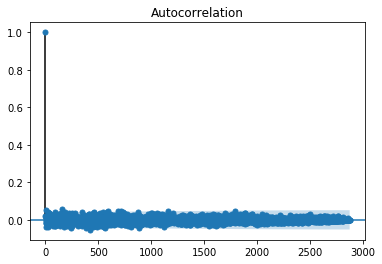

In [404]:
from statsmodels.stats.stattools import durbin_watson

# test for autocorrelation
def autocorrelation(X, regression_model):
    # calculate the lag, optional
    lag = min(10, (len(X)//5))

    # run the Ljung-Box test for no autocorrelation of residuals
    # test_results = diag.acorr_breusch_godfrey(est, nlags = lag, store = True)
    test_results = diag.acorr_ljungbox(regression_model.resid, lags = lag)

    # grab the p-values and the test statistics
    ibvalue, p_val = test_results
    return p_val, lag

# print the results of the test

def printAutocorrelation(p_val, lag):
    print('The number of lags will be {}'.format(lag))
    print('-'*100)

    if min(p_val) > 0.05:
        print("The lowest p-value found was {:.4}".format(min(p_val)))
        print("We fail to reject the null hypthoesis, so there is no autocorrelation.")
        print('-'*100)
    else:
        print("The lowest p-value found was {:.4}".format(min(p_val)))
        print("We reject the null hypthoesis, so there is autocorrelation.")
        print('-'*100)

p_val, lag = autocorrelation(X, regression_model)    
printAutocorrelation(p_val, lag)

# plot autocorrelation
sm.graphics.tsa.plot_acf(regression_model.resid)
plt.show()

### Checking for normally distributed residuals and that the mean of the residuals equals 0

It is easy to check for normally distributed residuals; we will do it visually. This will require using a QQ pplot which help us assess if a set of data plausibly came from some theoretical distribution such as a Normal or exponential. It’s just a visual check, not an air-tight proof, so it is somewhat subjective.

Visually what we are looking for is the data hugs the line tightly; this would give us confidence in our assumption that the residuals are normally distributed. Now, it is highly unlikely that the data will perfectly hug the line, so this is where we have to be subjective.

Because we calculate models trhough iteration, this is something we will check before or after we itereate, with a single model, just to see if it is somewhat safe to assume the residuals are normally distributed

On the other hand, we need to check that the mean of the residuals is equal to zero. If the mean is very close to zero, then we are good to proceed. Just a side note, it's not uncommon to get a mean that isn't exactly zero; this is because of rounding errors. However, if it's very close to zero, it's ok. In the example below, you will see that it doesn't come out exactly to zero.
At teh end of each iteration we will calculate the average of the means of the residuals of each iterated model, and we will use that to check.

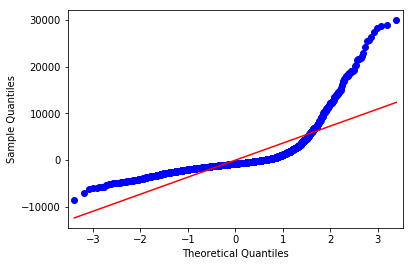

The mean of the residuals is 4.719e-09


In [405]:
import pylab
# check for the normality of the residuals
def plotResiduals(regression_model):
    sm.qqplot(regression_model.resid, line='s')
    pylab.show()

# also check that the mean of the residuals is approx. 0.
def meanResiduals(regression_model):
    mean_residuals = sum(regression_model.resid)/ len(regression_model.resid)
    return mean_residuals

plotResiduals(regression_model)
mean_residuals = meanResiduals(regression_model)
print("The mean of the residuals is {:.4}".format(mean_residuals))

# Regression Model by Iteration

Now that we have ways of analysing our models, lets start building them.

One of the big risks of modeling a regression model is overfiting it. In order to mitigate that risk, we create a model via iteration, meaning we create 1000 models, splitting the data randomly at each iteration. After the cycle, we take the coefficients and their p-values and average them out to create our final model. To do this we levarege all the fucntions created above.

At the bottom, you can see the 1000 models created, and afterwards the final one.

In [529]:
# Model training function (X = independent variables data, Y = independent variable data)
def createModel(X, Y, train_data):
        
    # Create models' dataframe with all variables but empty
    models = train_data.drop('shares', axis = 1).iloc[0:0]

    # Add column for the constant (on first column)
    models.insert(0, 'const', [], True)
    
    # Create a dataframe for pvalues
    pvalues_df = models.copy()
    
    # Iteration for regression creation
    for i in range(0,1000):
        
        # Train Single Regression
        regression_model,  x_train, x_test, y_train, y_test  = trainRegression(X, Y)
        
        # Retrieve Coefficient Dicitionary
        model_coeff = retrieveModelCoeff(regression_model)
        
        # Checking for heteroscedasticity
        pval = heteroscedasticity(regression_model)
        #['heteroscedasticity'] = pval
        
        # Checking for autocorrelation
        p_val, lag = autocorrelation(X, regression_model)
        #model_coeff['autocorrelation'] = p_val
        
        # Checking mean of residuals
        mean_residuals = meanResiduals(regression_model)
        #model_coeff['meanResiduals'] = mean_residuals

        model_coeff.update({'heteroscedasticity': pval,'autocorrelation': min(p_val), 'meanResiduals': mean_residuals}) 
        
        # Add the new model to models
        models = models.append(model_coeff, ignore_index=True)
        
        # Add new model pvalues to pvalues_df
        coeff_pvalues_df = pvalues_df.append(regression_model.pvalues, ignore_index=True)
    
        
        
    # Create the final model dictionary from the averages of coefficients and p-values the iterations
    final_model = {}
    for column in models.columns:
        final_model[column] = models[column].mean()
        # change null coefficients to 0
        if math.isnan(final_model[column]):
            final_model[column] = 0
    
    # Predict results with final model
    final_pred = modelPredict(X, final_model)
    
    # Retrive Stats for final model
    r2, adj_r2, mae, rmse, rmsle, n_observations, n_variables_used = retrieveStats(Y, final_pred, X)
    
    # Add Stats to the model
    final_model['r2'] = r2
    final_model['adj_r2'] = adj_r2
    final_model['mae'] = mae
    final_model['rmse'] = rmse
    final_model['rmsle'] = rmsle
    final_model['n_variables_used'] = n_variables_used
    
    # Add description
    variables_used = X.columns.copy()
    final_model['variables_used'] = ';'.join(X.columns)
    
    # Create final pvalues dictionary from the averages of the iterations
    final_pvalues = {}
    for column in coeff_pvalues_df.columns:
        final_pvalues[column] = coeff_pvalues_df[column].mean()
        # change null coefficients to 0
        if math.isnan(final_pvalues[column]):
            final_pvalues[column] = 0    
    
    
    
    return final_model, final_pvalues, final_pred, models, pvalues_df, variables_used

# Defining Dependent Variable (Y) and Independent Variables (x)
X, Y = createXY(filtered_train_df)
#final_model, final_pvalues, final_pred, models_df, pvalues_df, variables_used = createModel(X, Y, filtered_train_df)
models_df

const  timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
0  523.238047   0.0        0.0             0.0               1816.974815       
1  1167.040589  0.0        0.0             0.0               1309.707459       
2  887.410977   0.0        0.0             0.0               1576.903538       
3  711.064919   0.0        0.0             0.0               1389.071221       
4  635.020309   0.0        0.0             0.0               1588.488856       

   num_hrefs  num_self_hrefs   num_imgs  num_videos  average_token_length  \
0  17.060179  0.0             48.769636  49.918026   0.0                    
1  24.044669  0.0             45.213505  37.365975   0.0                    
2  28.508013  0.0             52.219668  63.114565   0.0                    
3  26.198473  0.0             37.844699  31.963591   0.0                    
4  25.802688  0.0             63.005590  66.627439   0.0                    

   num_keywords  data_channel_is_lifestyle  data_channel_is_entertainment  \
0 -54.212126     0.0                       -726.751672                      
1 -94.330002     0.0                       -813.882902                      
2 -96.061518     0.0                       -536.581436                      
3 -107.088719    0.0                       -812.213962                      
4 -84.511035     0.0                       -414.111389                      

   data_channel_is_bus  data_channel_is_socmed  data_channel_is_world  \
0 -699.854307           0.0                    -788.228257              
1 -778.896401           0.0                    -853.893924              
2 -701.332613           0.0                    -807.052187              
3 -705.084116           0.0                    -758.114330              
4 -557.508658           0.0                    -671.831285              

   kw_max_min  kw_avg_min  kw_min_max  kw_max_max  kw_avg_max  kw_min_avg  \
0  0.0         0.0         0.0         0.0        -0.001485   -0.123152     
1  0.0         0.0         0.0         0.0        -0.001679   -0.276481     
2  0.0         0.0         0.0         0.0        -0.001957   -0.308763     
3  0.0         0.0         0.0         0.0        -0.001471   -0.261369     
4  0.0         0.0         0.0         0.0        -0.001526   -0.258937     

   kw_avg_avg  self_reference_avg_sharess  weekday_is_monday  \
0  0.746349    0.040850                    0.0                 
1  0.826276    0.038012                    0.0                 
2  0.877186    0.036783                    0.0                 
3  0.853650    0.038421                    0.0                 
4  0.872448    0.031379                    0.0                 

   weekday_is_tuesday  weekday_is_wednesday  weekday_is_thursday  \
0 -491.522059         -137.656258           -319.841482            
1 -515.610921         -452.040852           -578.907539            
2 -720.281780         -292.035080           -458.110171            
3 -345.796790         -150.105318           -219.607087            
4 -450.895515         -294.296476           -243.538703            

   weekday_is_friday  weekday_is_saturday  weekday_is_sunday  is_weekend  \
0  0.0                0.0                  0.0                492.215712   
1  0.0                0.0                  0.0                742.130916   
2  0.0                0.0                  0.0                283.162646   
3  0.0                0.0                  0.0                536.790970   
4  0.0                0.0                  0.0                355.233578   

        LDA_01      LDA_03  LDA_04  global_subjectivity  \
0 -654.796592  -465.238795  0.0     0.0                   
1 -781.025924  -232.891940  0.0     0.0                   
2 -1188.726610 -610.847206  0.0     0.0                   
3 -976.910989  -45.970790   0.0     0.0                   
4 -1325.231569 -350.477927  0.0     0.0                   

   global_rate_positive_words  rate_positive_words  rate_negative_words  \
0  0.0             

In [407]:
#Visualize final_model
final_model_df = pd.DataFrame(data=final_model, index = [0])
final_model_df

const  timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
0 -1968.495383 -0.063539   55.603483       0.088234          1634.02051        

   num_hrefs  num_self_hrefs   num_imgs  num_videos  average_token_length  \
0  25.068714 -27.17554        42.056107  34.898289   268.159607             

   num_keywords  data_channel_is_lifestyle  data_channel_is_entertainment  \
0 -73.99206      9.794891e-09              -786.081634                      

   data_channel_is_bus  data_channel_is_socmed  data_channel_is_world  \
0 -811.39222           -234.723971             -888.380977              

   kw_max_min  kw_avg_min  kw_min_max  kw_max_max  kw_avg_max  kw_min_avg  \
0 -0.061974    0.223409   -0.002788   -0.000423   -0.001315   -0.190319     

   kw_avg_avg  self_reference_avg_sharess  weekday_is_monday  \
0  0.828493    0.039607                   -256.788511          

   weekday_is_tuesday  weekday_is_wednesday  weekday_is_thursday  \
0 -661.571521         -465.53349            -552.775951            

   weekday_is_friday  weekday_is_saturday  weekday_is_sunday  is_weekend  \
0 -267.166804         107.116036           128.224858         235.340894   

       LDA_01      LDA_03     LDA_04  global_subjectivity  \
0 -807.930144 -314.940666 -39.025344  204.114466            

   global_rate_positive_words  rate_positive_words  rate_negative_words  \
0 -2317.594621                 1074.075844          486.84896             

   avg_positive_polarity  min_positive_polarity  avg_negative_polarity  \
0  211.091284            -812.371928            -1390.125738             

   max_negative_polarity  title_subjectivity  abs_title_subjectivity  \
0  1752.237979            314.862879          519.520413               

   abs_title_sentiment_polarity  LDA_00  LDA_02  autocorrelation  \
0  131.243584                    0.0     0.0     0.263016          

   data_channel_is_tech  global_rate_negative_words  \
0  0.0                   0.0                          

   global_sentiment_polarity  heteroscedasticity  kw_max_avg  kw_min_min  \
0  0.0                        1.574036e-07        0.0         0.0          

   max_positive_polarity  meanResiduals  min_negative_polarity  \
0  0.0                   -3.616966e-10   0.0                     

   n_non_stop_unique_tokens  n_non_stop_words  self_reference_max_shares  \
0  0.0                       0.0               0.0                         

   self_reference_min_shares  title_sentiment_polarity        r2    adj_r2  \
0  0.0                        0.0                       0.097535  0.087537   

           mae         rmse     rmsle  n_variables_used  \
0  2014.609243  3661.950002  0.908017  45                 

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          variables_used  
0  timedelta;n_tokens_title;n_tokens_content;n_unique_tokens;num_hrefs;num_self_hrefs;num_imgs;num_videos;average_token_length;num_keywords;data_channel_is_lifestyle;data_channel_is_entertainment;data_channel_is_bus;data_channel_is_socmed;data_channel_is_world;kw_max_min;kw_avg_min;kw_min_max;kw_max_max;kw_avg_max;kw_min_avg;kw_avg_avg;self_reference_avg_sharess;weekday_is_monday;weekday_is_tuesday;weekday_is_wednesday;weekday_is_thursday;weekday_is_friday;weekday_is_saturday;weekday_is_sunday;is_weeke

# Backwards Propagate

Now that we have all the function we need created, we can start to analyse our data and begin working the problem. The fisrt step is to find the set of varibles that contribute the best to the model that predicts the dependent variable. To do this we use the Backwards Propagate method, where we will be creating a regression model with all the variables and progressivly dropping the varibles which coefficients have the highest p-values for the t statistic. 

A high p-value doesn't reject the null hypothesis that the variable has a coefficient of zero, thus the variable shoudn't be in the model.

We do this process by iteration, removing a varible at the end of each cycle. You can see all models, statistics and uded variables below

In [408]:
# Defining Dependent Variable (Y) and Independent Variables (x)
X, Y = createXY(filtered_train_df)

# Create models' list
final_models_list = []
final_models_df = sm.add_constant(X).copy().iloc[0:0]
final_pvalues_list = []
final_pvalues_df = final_models_df.copy()

# Create predictions dataframe
variables_used_list = []
predictions_df = pd.DataFrame(index = X.index)
d = {'var': [], 'pvalue': []}
iteration_df = pd.DataFrame(data=d)
iteration_df.index.rename('iteration')
i = len(X.columns)
while i > 0:
    dic = {}
    
    final_model, final_pvalues, final_pred, models_df, pvalues_df, variables_used = createModel(X, Y, filtered_train_df)
    
    final_models_list.append(final_model)
    final_models_df = final_models_df.append(final_model, ignore_index=True)
    final_pvalues_list.append(final_pvalues)
    final_pvalues_df = final_pvalues_df.append(final_pvalues, ignore_index=True)
    variables_used_list.append(variables_used)
    
    # Add preditctions to dataframe
    predictions_df[str(60-i)] = final_pred.values
    
    # Find var to remove
    pvalue = 0
    var_to_remove = ''
    for var in final_pvalues:
        if var != 'const':
            if final_pvalues[var] >= pvalue:
                pvalue = final_pvalues[var]
                var_to_remove = var
    X = dropVar(X, var_to_remove)
    dic['var'] = var_to_remove
    dic['pvalue'] = pvalue
    iteration_df = iteration_df.append(dic, ignore_index = True)
    i -= 1

final_models_df

SyntaxError: invalid syntax (<ipython-input-408-4168159887cf>, line 11)

Now, all we have to do is to find the best model. In this case, we are looking for the highest adjusted R squared smaller or equal to 1. The reasoning behnind this is that the 'adj_r2' measures overall fit of the model while also taking into account the number of variables used. A value bigger than one means the values predicted by the model are too different from the real ones, and a value equal to zero means that we would be better of just assuming that each observation of de dependent variable is equal to the mean, therefore we want the highest lower than 1 value for adj_r2, which will tell us the amount of variables that is optimal for calculating a regression model.

We quickly notice that all models have autocarrelation p-value higher than 0.05 so we won't use as criteria. At the same time, all models reject the null hypothesis of the no heteroscedasticity test, so we will have to find new ways to remove the heteroscedasticity

In [ ]:
# Get highest adj_r2 model
highest_adj_r2 = 0
best_model_index = -1
for i in range(0, len(final_models_list)):
    if final_models_list[i]['adj_r2'] >= highest_adj_r2 and final_models_list[i]['adj_r2'] <= 1:
            highest_adj_r2 = final_models_list[i]['adj_r2']
            best_model_index = i

print('Adjusted r2: ', final_models_list[best_model_index]['adj_r2'] )
print('RMSE: ', final_models_list[best_model_index]['rmse'] )            
print('Mean of residuals: ', final_models_list[best_model_index]['meanResiduals'] )
print('Heteroscedasticity p-value: ', final_models_list[best_model_index]['heteroscedasticity'] )
print('Autocorrelation p-value: ', final_models_list[best_model_index]['autocorrelation'] )

# Visualize final_model in a data frame
best_model_df = pd.DataFrame(data=final_models_list[best_model_index], index = [0])
best_model_df

In [ ]:
used_variables = ['n_unique_tokens', 'num_hrefs', 'num_imgs', 'num_videos', 'num_keywords', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_world', 'kw_avg_max', 'kw_min_avg', 'kw_avg_avg', 'self_reference_avg_sharess', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'is_weekend', 'LDA_01', 'avg_negative_polarity', 'max_negative_polarity', 'title_subjectivity', 'abs_title_subjectivity']

X, Y = createXY(filtered_train_df)

for column in X.columns:
    if column not in used_variables:
        X_removed = dropVar(X, column)

random_regression_model,  x_train, x_test, y_train, y_test  = trainRegression(X, Y)


random_regression_model.summary()

In [ ]:
pval = heteroscedasticity(random_regression_model)
printHeteroResults(pval)

print('------------')
print('Residuals Normality')
plotResiduals(random_regression_model)

# Backwards Propagate Conclusions

The backwards propagate method pointed out that we should focus on the following 21 variables: 

n_unique_tokens; num_hrefs; num_imgs; num_videos; num_keywords; data_channel_is_entertainment; data_channel_is_bus; data_channel_is_world; kw_avg_max; kw_min_avg; kw_avg_avg; self_reference_avg_sharess; weekday_is_tuesday; weekday_is_wednesday; weekday_is_thursday; is_weekend; LDA_01; avg_negative_polarity; max_negative_polarity; title_subjectivity; abs_title_subjectivity

The next steps will focus on decresing the prediciton errors (mae, rmse, rmsle). To do that we will use tactics such as variable transformations to normalize them and create better linear relationships with the dependent variable. We will also test teh model by joining different variables as componenets or even try combinations of varibles that weren't pointed out in the backwards propagate method but are higly correlated to those that were.

# Variable Analysis

In the following section, we have a look at the variables and analyse correlations, transformations and components

### How well does our model do on Kaggle?

We see how well this model does on kaggle, to do that we predict the validation results and create a function the build a .csv file read for upload

In [ ]:
predictionSeries = modelPredict(validation_df, final_models_list[best_model_index])
predictionSeries

In [ ]:
# Create prediction file to upload
def createUploadPRediction(modelName, modelSeries):
    sample_df = pd.read_csv("Upload_Predictions/model_1.csv", index_col = 'id')
    sample_df['Prediction'] = modelSeries.values
    
    # I can choose weather do give a number to a model or a name, if I wnat to give it a custom name
    if type(modelName) == str:   
        sample_df.to_csv('Upload_Predictions/{}.csv'.format(modelName))
    else:
        sample_df.to_csv('Upload_Predictions/model_{}.csv'.format(modelNumber))
    return sample_df

upload_prediction = createUploadPRediction('BackwardsPropagate', predictionSeries)
upload_prediction

# Working The Data

Now, we have the varaibles that are probably the best to use for training the model, we have everything we need to evaluate the model, all that is left for us to do is to work the data to optmise the regressions we create

### Variable Transformation

one of the best things we can do is transforming the variables

In [625]:
# Transform variables functions
def logVar(var):
    var += 1
    var = np.log(var)
    return var

def poweredTo(var, power):
    var = var**power
    return var

def multiply(var, factor):
    var = var*factor
    return var

def normalizeVar(varValues):
    varValues = (varValues - min(varValues))/(max(varValues)- min(varValues))
    return varValues

# Create transformed data frame (we will be creating new variables that are transformations)
transf_train_df = filtered_train_df.copy()
transf_validation_df = validation_df.copy()

# Dependent Variable transformations (will require inverse transformation)
#transf_train_df = transf_train_df.apply(lambda x: poweredTo(x,(1/3)) if x.name == 'shares' else x) # cube root of train shares

# Independent Variable transformations
#transf_train_df['ln(self_reference_avg_sharess + 1)'] = transf_train_df['self_reference_avg_sharess'].values
#transf_train_df = transf_train_df.apply(lambda x: logVar(x) if x.name == 'ln(self_reference_avg_sharess + 1)' else x)
#transf_validation_df['ln(self_reference_avg_sharess + 1)'] = transf_validation_df['self_reference_avg_sharess'].values
#transf_validation_df = transf_validation_df.apply(lambda x: logVar(x) if x.name == 'ln(self_reference_avg_sharess + 1)' else x)

# tranform
#transf_train_df['num_imgs^3'] = transf_train_df['num_imgs'] **3
#transf_train_df['kw_avg_max^3'] = transf_train_df['kw_avg_max'] **3
#transf_train_df['kw_min_avg^3'] = transf_train_df['kw_min_avg'] **3
#transf_train_df['kw_avg_avg^3'] = transf_train_df['kw_avg_avg'] **3
#transf_train_df['self_reference_avg_sharess^3'] = transf_train_df['self_reference_avg_sharess'] **3
#transf_train_df['LDA_01^3'] = transf_train_df['LDA_01'] ** 3
transf_train_df['avg_negative_polarity^3'] = transf_train_df['avg_negative_polarity'] **3
transf_train_df['title_subjectivity^3'] = transf_train_df['title_subjectivity'] **3
transf_train_df['abs_title_subjectivity^3'] = transf_train_df['abs_title_subjectivity'] **3

#transf_validation_df['num_imgs^3'] = transf_validation_df['num_imgs'] **3
#transf_validation_df['kw_avg_max^3'] = transf_validation_df['kw_avg_max'] **3
#transf_validation_df['kw_min_avg^3'] = transf_validation_df['kw_min_avg'] **3
#transf_validation_df['kw_avg_avg^3'] = transf_validation_df['kw_avg_avg'] **3
#transf_validation_df['self_reference_avg_sharess^3'] = transf_validation_df['self_reference_avg_sharess'] **3
#transf_validation_df['LDA_01^3'] = transf_validation_df['LDA_01'] **3
transf_validation_df['avg_negative_polarity^3'] = transf_validation_df['avg_negative_polarity'] **3
transf_validation_df['title_subjectivity^3'] = transf_validation_df['title_subjectivity'] **3
transf_validation_df['abs_title_subjectivity^3'] = transf_validation_df['abs_title_subjectivity'] **3
#transf_validation_df['LDA_03^3'] = transf_validation_df['LDA_03'] **3



transf_train_df['i1'] = transf_train_df['data_channel_is_entertainment'] * transf_train_df['LDA_01']
transf_train_df['i2'] = transf_train_df['kw_min_avg'] * transf_train_df['kw_avg_max']
transf_train_df['i3'] = transf_train_df['kw_avg_avg'] * transf_train_df['kw_avg_max']
transf_train_df['i4'] = transf_train_df['kw_min_avg'] * transf_train_df['kw_avg_avg']
transf_train_df['i5'] = transf_train_df['LDA_03'] * transf_train_df['kw_avg_avg']
transf_train_df['i6'] = transf_train_df['abs_title_subjectivity'] * transf_train_df['title_subjectivity']
transf_train_df['i7'] = transf_train_df['max_negative_polarity'] * transf_train_df['avg_negative_polarity']

transf_validation_df['i1'] = transf_validation_df['data_channel_is_entertainment'] * transf_validation_df['LDA_01']
transf_validation_df['i2'] = transf_validation_df['kw_min_avg'] * transf_validation_df['kw_avg_max']
transf_validation_df['i3'] = transf_validation_df['kw_avg_avg'] * transf_validation_df['kw_avg_max']
transf_validation_df['i4'] = transf_validation_df['kw_min_avg'] * transf_validation_df['kw_avg_avg']
transf_validation_df['i5'] = transf_validation_df['LDA_03'] * transf_validation_df['kw_avg_avg']
transf_validation_df['i6'] = transf_validation_df['abs_title_subjectivity'] * transf_validation_df['title_subjectivity']
transf_validation_df['i7'] = transf_validation_df['max_negative_polarity'] * transf_validation_df['avg_negative_polarity']


#transf_validation_df['componente_Guida'] = 0.958 * transf_validation_df['data_channel_is_world'] + 0.958*transf_validation_df['LDA_02']

# Normalize training data variables
#transf_train_df['norm(self_reference_avg_sharess)'] = normalizeVar(transf_train_df['self_reference_avg_sharess'].values)
transf_train_df['norm(kw_avg_max)'] = normalizeVar(transf_train_df['kw_avg_max'].values)
transf_train_df['norm(kw_min_avg)'] = normalizeVar(transf_train_df['kw_min_avg'].values)
transf_train_df['norm(kw_avg_avg)'] = normalizeVar(transf_train_df['kw_avg_avg'].values)

# Normalize validation data variables
#transf_validation_df['norm(self_reference_avg_sharess)'] = normalizeVar(transf_validation_df['self_reference_avg_sharess'].values)
transf_validation_df['norm(kw_avg_max)'] = normalizeVar(transf_validation_df['kw_avg_max'].values)
transf_validation_df['norm(kw_min_avg)'] = normalizeVar(transf_validation_df['kw_min_avg'].values)
transf_validation_df['norm(kw_avg_avg)'] = normalizeVar(transf_validation_df['kw_avg_avg'].values)

transf_train_df

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
id                                                                     
1.0     198.0      6.0             47.0              0.914894          
2.0     660.0      7.0             181.0             0.519337          
3.0     552.0      9.0             862.0             0.465089          
8.0     111.0      10.0            437.0             0.527907          
9.0     709.0      10.0            289.0             0.614035          
10.0    188.0      11.0            154.0             0.678322          
11.0    542.0      5.0             515.0             0.459794          
13.0    594.0      7.0             148.0             0.673469          
14.0    443.0      7.0             407.0             0.433333          
15.0    540.0      13.0            100.0             0.770000          
17.0    121.0      9.0             734.0             0.446903          
18.0    517.0      8.0             353.0             0.550432          
19.0    541.0      5.0             914.0             0.463576          
20.0    113.0      11.0            1427.0            0.375706          
21.0    238.0      11.0            338.0             0.614679          
22.0    100.0      13.0            259.0             0.609562          
23.0    22.0       10.0            367.0             0.584270          
24.0    298.0      12.0            1521.0            0.347383          
25.0    695.0      9.0             242.0             0.660714          
26.0    105.0      11.0            242.0             0.601810          
27.0    542.0      14.0            594.0             0.474576          
29.0    127.0      15.0            557.0             0.530841          
30.0    199.0      12.0            136.0             0.768657          
31.0    648.0      13.0            288.0             0.571942          
32.0    528.0      9.0             253.0             0.610442          
33.0    722.0      8.0             159.0             0.675159          
34.0    267.0      7.0             321.0             0.532915          
35.0    625.0      5.0             453.0             0.504484          
36.0    456.0      8.0             613.0             0.547579          
37.0    123.0      14.0            727.0             0.508380          
...       ...      ...               ...                  ...          
4963.0  287.0      10.0            1106.0            0.403738          
4964.0  504.0      9.0             313.0             0.591362          
4965.0  716.0      7.0             90.0              0.865169          
4966.0  85.0       10.0            745.0             0.500719          
4967.0  203.0      11.0            114.0             0.646018          
4968.0  316.0      8.0             737.0             0.446453          
4969.0  400.0      5.0             1183.0            0.429668          
4970.0  689.0      9.0             437.0             0.452436          
4971.0  308.0      8.0             358.0             0.581006          
4973.0  93.0       11.0            1124.0            0.394643          
4975.0  161.0      12.0            367.0             0.601648          
4976.0  645.0      9.0             589.0             0.476844          
4978.0  729.0      11.0            173.0             0.723529          
4980.0  65.0       17.0            103.0             0.728155          
4981.0  564.0      10.0            870.0             0.504046          
4983.0  446.0      12.0            212.0             0.625616          
4984.0  282.0      10.0            144.0             0.636364          
4985.0  250.0      14.0            783.0             0.435006          
4986.0  93.0       10.0            516.0             0.547475          
4988.0  102.0      10.0            330.0             0.561350          
4989.0  371.0      13.0            137.0             0.742647          
4990.0  332.0      8.0             612.0             0.490164          
4992.0  471.0      8.0             279.0        

### Create groups for testing different combinations of variables

In [603]:
modelNumber = 8
# Variables that are always used
variables=['n_unique_tokens','num_hrefs','num_imgs','num_videos','num_keywords','data_channel_is_entertainment','data_channel_is_bus','data_channel_is_world','kw_avg_max','kw_min_avg','kw_avg_avg','self_reference_avg_sharess','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','is_weekend','LDA_01','LDA_03','max_negative_polarity','avg_negative_polarity^3','title_subjectivity^3','abs_title_subjectivity^3']
# Combinations of variables to test:

#group0=['num_imgs','num_imgs^3']
#group1=['kw_avg_max','kw_avg_max^3']
#group2=['kw_min_avg','kw_min_avg^3']
#group3=['kw_avg_avg','kw_avg_avg^3']
#group4=['self_reference_avg_sharess','self_reference_avg_sharess^3']
#group5=['LDA_01','LDA_01^3']
#group6=['avg_negative_polarity','avg_negative_polarity^3']
#group7=['title_subjectivity','title_subjectivity^3']
#group8=['abs_title_subjectivity','abs_title_subjectivity^3']
#group9=['LDA_03','LDA_03^3']

#group0 = ['kw_avg_max','norm(kw_avg_max)']
#group1 = ['kw_min_avg','norm(kw_min_avg)']
#group2 = ['kw_avg_avg', 'norm(kw_avg_avg)']
#group3 = ['norm(self_reference_avg_sharess)','norm(self_reference_avg_sharess)']

#i1 = ['i1','i2','i3','i4','i5','i6','i7']
#i2 = ['i1', 'i2']

#v1 = variables.copy()
#v1.extend(i1)
#v2 = variables.copy()
#v2.extend(i2)
#groups = [group0, group1, group2, group3]

#combinations = [variables, v1, v2]

# Create the different combinations
combinations = [variables]    
#for i in group0:
 #   for j in group1:
  #      for k in group2:
   #         for l in group3:
    #            combinations.append([i,j,k,l])
                                        
#for combination in combinations:
 #   combination.extend(variables)


# The numb of combinations has to be the multplication of the number of variables of each group
#numbCombinations = 1
#for i in range(0, len(groups)):
 #   numbCombinations = numbCombinations * len(groups[i])
# Check its okay
print('Number of combinations created: ',len(combinations))
#print('Condition is met:', len(combinations) == numbCombinations)


Number of combinations created:  1


In [604]:
# Save the combination groups
def saveCombinationGroup(varGroups):
    with open('Combination_Study/allCombinationsGroups.json') as json_file:
        combinationGroupsList = json.load(json_file)
    # Set the new combination number
    combinationGroupNumber = len(combinationGroupsList)
    # Create the new combination dictionary
    combinationGroup = {'combination' : combinationGroupNumber}
    for i in range(0, len(varGroups)):
        combinationGroup['group{}'.format(i)] = varGroups[i]
    # Add combination do combinationList
    combinationGroupsList.append(combinationGroup)
    # Save combinationsList and new combination
    with open('Combination_Study/allCombinationsGroups.json'.format(combinationGroupNumber), 'w') as outfile:
            json.dump(combinationGroupsList, outfile)
    with open('Combination_Study/combinationGroup_{}.json'.format(combinationGroupNumber), 'w') as outfile:
            json.dump(combinationGroup, outfile)
    
    return combinationGroup, combinationGroupNumber


# Call the saveCombinationGroup in json dictionary
#combinationGroup, combinationGroupNumber = saveCombinationGroup(group)
#print(combinationGroupNumber)
combinations

[['n_unique_tokens',
  'num_hrefs',
  'num_imgs',
  'num_videos',
  'num_keywords',
  'data_channel_is_entertainment',
  'data_channel_is_bus',
  'data_channel_is_world',
  'kw_avg_max',
  'kw_min_avg',
  'kw_avg_avg',
  'self_reference_avg_sharess',
  'weekday_is_tuesday',
  'weekday_is_wednesday',
  'weekday_is_thursday',
  'is_weekend',
  'LDA_01',
  'LDA_03',
  'max_negative_polarity',
  'avg_negative_polarity^3',
  'title_subjectivity^3',
  'abs_title_subjectivity^3']]

### Training the combinations

In [605]:
# Create dataframe for the models created with each combination
regressionModels_df = pd.read_csv('Combination_Study/base_df.csv', index_col = 'model')

# Create list for the models created with each combination
regressionModels_list = []
preidcition_list = []

for combination in combinations:
    
    # Create X and Y from transformed data 
    X, Y = createXY(transf_train_df)

    
    # Drop independet variables not part of the combination
    for var in X.columns:
        if var not in combination:
            X.drop(var, axis=1, inplace=True)
    
    
    
    final_model, final_pvalues, final_pred, models_df, pvalues_df, variables_used = createModel(X, Y, transf_train_df)
    
    # Add prediction to list
    preidcition_list.append(final_pred)
    
    # Add final model of combination to regressions list
    regressionModels_list.append(final_model)
    
    # Add final model of combination to regression models dataframe
    regressionModels_df = regressionModels_df.append(final_model, ignore_index=True)
    regressionModels_df.index.rename('model', inplace = True)

    #print(len(regressionModels_list))
# Create .json file with list for the models created with each combination of combination group
#with open('Combination_Study/combinationGroup_{}_models.json'.format(combinationNummber), 'w') as outfile:
 #   json.dump(regressionModels_list, outfile)
# Create .csv file dataframe for the models created with each combination of combination group
#regressionModels_df.to_csv('Combination_Study/combinationGroup_{}_models.csv'.format(combinationNummber))

regressionModels_df

const  timedelta  n_tokens_title  n_tokens_content  \
model                                                            
0      777.260835  0.0        0.0             0.0                

       n_unique_tokens  n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  \
model                                                                           
0      1217.022173      0.0               0.0                       26.274404   

       num_self_hrefs   num_imgs  num_videos  average_token_length  \
model                                                                
0      0.0             40.770954  37.668675   0.0                    

       num_keywords  data_channel_is_lifestyle  data_channel_is_entertainment  \
model                                                                           
0     -73.89695      0.0                       -744.896691                      

       data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
model                                                                      
0     -651.71005            0.0                     0.0                    

       data_channel_is_world  kw_min_min  kw_max_min  kw_avg_min  kw_min_max  \
model                                                                          
0     -771.863306             0.0         0.0         0.0         0.0          

       kw_max_max  kw_avg_max  kw_min_avg  kw_max_avg  kw_avg_avg  \
model                                                               
0      0.0        -0.001744   -0.220596    0.0         0.813693     

       self_reference_min_shares  self_reference_max_shares  \
model                                                         
0      0.0                        0.0                         

       self_reference_avg_sharess  weekday_is_monday  weekday_is_tuesday  \
model                                                                      
0      0.038149                    0.0               -411.958239           

       weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  \
model                                                                 
0     -191.059628           -303.090946           0.0                 

       weekday_is_saturday  weekday_is_sunday  is_weekend  LDA_00      LDA_01  \
model                                                                           
0      0.0                  0.0                620.033864  0.0    -735.176168   

       LDA_02      LDA_03  LDA_04  global_subjectivity  \
model                                                    
0      0.0    -166.860325  0.0     0.0                   

       global_sentiment_polarity  global_rate_positive_words  \
model                                                          
0      0.0                        0.0                          

       global_rate_negative_words  rate_positive_words  rate_negative_words  \
model                                                                         
0      0.0                         0.0                  0.0                   

       avg_positive_polarity  min_positive_polarity  max_positive_polarity  \
model                                                                        
0      0.0                    0.0                    0.0                     

       avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
model                                                                        
0      0.0                    0.0                    1495.111314             

       title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
model                                                                         
0      0.0                 0.0                       0.0                      

       abs_title_sentiment_polarity    adj_r2  f_pvalue          mae  mse  \
model                                                                       
0      0.0                           0.091235 NaN        2012.685455 NaN    

             

In [606]:
min_rmse = 100000000
bestIndex = 0
for index, row in regressionModels_df.iterrows():
    if row['rmse'] < min_rmse:
        min_rmse = row['rmse']
        bestIndex = index
print(bestIndex )

#delete all rows in regressions except for best
bestModel = regressionModels_df.copy()
for index, row in bestModel.iterrows():
    if index != bestIndex :
        bestModel = bestModel.drop(index)
bestModel = bestModel.reset_index(drop=True)

bestModel.to_csv('finalModels/modelo_{}.csv'.format(modelNumber))
bestModel

0


const  timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
0  777.260835  0.0        0.0             0.0               1217.022173       

   n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
0  0.0               0.0                       26.274404  0.0              

    num_imgs  num_videos  average_token_length  num_keywords  \
0  40.770954  37.668675   0.0                  -73.89695       

   data_channel_is_lifestyle  data_channel_is_entertainment  \
0  0.0                       -744.896691                      

   data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
0 -651.71005            0.0                     0.0                    

   data_channel_is_world  kw_min_min  kw_max_min  kw_avg_min  kw_min_max  \
0 -771.863306             0.0         0.0         0.0         0.0          

   kw_max_max  kw_avg_max  kw_min_avg  kw_max_avg  kw_avg_avg  \
0  0.0        -0.001744   -0.220596    0.0         0.813693     

   self_reference_min_shares  self_reference_max_shares  \
0  0.0                        0.0                         

   self_reference_avg_sharess  weekday_is_monday  weekday_is_tuesday  \
0  0.038149                    0.0               -411.958239           

   weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  \
0 -191.059628           -303.090946           0.0                 

   weekday_is_saturday  weekday_is_sunday  is_weekend  LDA_00      LDA_01  \
0  0.0                  0.0                620.033864  0.0    -735.176168   

   LDA_02      LDA_03  LDA_04  global_subjectivity  global_sentiment_polarity  \
0  0.0    -166.860325  0.0     0.0                  0.0                         

   global_rate_positive_words  global_rate_negative_words  \
0  0.0                         0.0                          

   rate_positive_words  rate_negative_words  avg_positive_polarity  \
0  0.0                  0.0                  0.0                     

   min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
0  0.0                    0.0                    0.0                     

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0  0.0                    1495.111314            0.0                  

   title_sentiment_polarity  abs_title_subjectivity  \
0  0.0                       0.0                      

   abs_title_sentiment_polarity    adj_r2  f_pvalue          mae  mse  \
0  0.0                           0.091235 NaN        2012.685455 NaN    

         r2         rmse  otherDescription  trasnformedVariables  \
0  0.096103  3665.510698 NaN               NaN                     

   uesdComponents  usedVariables  abs_title_subjectivity^3  autocorrelation  \
0 NaN             NaN             469.717734                0.271555          

   avg_negative_polarity^3  heteroscedasticity  meanResiduals  \
0 -4879.433085              3.827182e-10       -3.033947e-08    

   n_variables_used     rmsle  title_subjectivity^3  \
0  22.0              0.906863  438.49267              

                                                                                                                                                                                                                                                                                                                                                                    variables_used  
0  n_unique_tokens;num_hrefs;num_imgs;num_videos;num_keywords;data_channel_is_entertainment;data_channel_is_bus;data_channel_is_world;kw_avg_max;kw_min_avg;kw_avg_avg;self_reference_avg_sharess;weekday_is_tuesday;weekday_is_wednesday;weekday_is_thursday;is_weekend;LDA_01;LDA_03;max_negative_polarity;avg_negative_polarity^3;title_subjectivity^3;abs_title_subjectivity^3

In [607]:
# Create dictionary
bestModel_dict = {}
for column in bestModel.columns:
    bestModel_dict[column] = bestModel.at[0, column]

bestModel_dict 

{'const': 777.2608345056468,
 'timedelta': 0.0,
 'n_tokens_title': 0.0,
 'n_tokens_content': 0.0,
 'n_unique_tokens': 1217.0221726997315,
 'n_non_stop_words': 0.0,
 'n_non_stop_unique_tokens': 0.0,
 'num_hrefs': 26.27440394347279,
 'num_self_hrefs': 0.0,
 'num_imgs': 40.770953655875935,
 'num_videos': 37.6686753915102,
 'average_token_length': 0.0,
 'num_keywords': -73.89695041042596,
 'data_channel_is_lifestyle': 0.0,
 'data_channel_is_entertainment': -744.896691159526,
 'data_channel_is_bus': -651.7100502581987,
 'data_channel_is_socmed': 0.0,
 'data_channel_is_tech': 0.0,
 'data_channel_is_world': -771.8633056855718,
 'kw_min_min': 0.0,
 'kw_max_min': 0.0,
 'kw_avg_min': 0.0,
 'kw_min_max': 0.0,
 'kw_max_max': 0.0,
 'kw_avg_max': -0.0017436368306725284,
 'kw_min_avg': -0.2205964947982845,
 'kw_max_avg': 0.0,
 'kw_avg_avg': 0.8136925848283472,
 'self_reference_min_shares': 0.0,
 'self_reference_max_shares': 0.0,
 'self_reference_avg_sharess': 0.038149374484150594,
 'weekday_is_monday

In [608]:
# Create validation prediction
y_predict = modelPredict(transf_validation_df, bestModel_dict)
y_predict

id
5001    2046.430050
5002    3810.194713
5003    2368.615994
5004    4413.893280
5005    3334.675157
5006    2768.101242
5007    3576.439692
5008    4275.051569
5009    2183.059895
5010    1016.454975
5011    2574.406353
5012    5622.382481
5013    1928.418189
5014    1710.381399
5015    8257.484546
5016    1409.180939
5017    1940.700393
5018    3302.297730
5019    1534.736050
5020    2424.402815
5021    1822.990108
5022    2878.286266
5023    5752.890528
5024    2655.652646
5025    1235.968787
5026    1826.681466
5027    1276.229355
5028    2621.717200
5029    2127.464239
5030    2724.907644
           ...     
5971    3638.488340
5972    3402.826498
5973    1760.860643
5974    2995.801192
5975    3225.812544
5976    1172.250588
5977    2885.536822
5978    3493.076061
5979    3779.839197
5980    2505.054933
5981    3471.205234
5982    2710.249251
5983    1352.277515
5984    3017.785082
5985    2409.410014
5986    1285.091187
5987    3098.433215
5988    2210.394777
5989    739.98391

In [609]:
upload_prediction = createUploadPRediction('modelo_{}'.format(modelNumber), y_predict)
upload_prediction

Prediction
id               
5001  2046.430050
5002  3810.194713
5003  2368.615994
5004  4413.893280
5005  3334.675157
5006  2768.101242
5007  3576.439692
5008  4275.051569
5009  2183.059895
5010  1016.454975
5011  2574.406353
5012  5622.382481
5013  1928.418189
5014  1710.381399
5015  8257.484546
5016  1409.180939
5017  1940.700393
5018  3302.297730
5019  1534.736050
5020  2424.402815
5021  1822.990108
5022  2878.286266
5023  5752.890528
5024  2655.652646
5025  1235.968787
5026  1826.681466
5027  1276.229355
5028  2621.717200
5029  2127.464239
5030  2724.907644
...           ...
5971  3638.488340
5972  3402.826498
5973  1760.860643
5974  2995.801192
5975  3225.812544
5976  1172.250588
5977  2885.536822
5978  3493.076061
5979  3779.839197
5980  2505.054933
5981  3471.205234
5982  2710.249251
5983  1352.277515
5984  3017.785082
5985  2409.410014
5986  1285.091187
5987  3098.433215
5988  2210.394777
5989  739.983910 
5990  1178.503716
5991  1216.459269
5992  862.031840 
5993  3796.629406
5994  1525.544677
5995  2474.730915
5996  4957.993391
5997  2221.442339
5998  4174.712883
5999  1736.190899
6000  4665.559433

[1000 rows x 1 columns]

In [617]:
model1 = pd.read_csv('finalModels/modelo_1.csv', index_col = 0)
model2 = pd.read_csv('finalModels/modelo_2.csv', index_col = 0)
model3 = pd.read_csv('finalModels/modelo_3.csv', index_col = 0)
model4 = pd.read_csv('finalModels/modelo_4.csv', index_col = 0)
model5 = pd.read_csv('finalModels/modelo_5.csv', index_col = 0)
model6 = pd.read_csv('finalModels/modelo_6.csv', index_col = 0)
model7 = pd.read_csv('finalModels/modelo_7.csv', index_col = 0)
model8 = pd.read_csv('finalModels/modelo_8.csv', index_col = 0)


model = model1.copy()
model = model.append(model2.iloc[0])
model = model.append(model3.iloc[0])
model = model.append(model4.iloc[0])
model = model.append(model5.iloc[0])
model = model.append(model6.iloc[0])
model = model.append(model7.iloc[0])
model = model.append(model8.iloc[0])
model.index = [1,2,3,4,5,6,7,8]
model

const  timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
1  317.327355   0.0        0.0             0.0               1445.494486       
2  325.974055   0.0        0.0             0.0               1431.930813       
3  1766.787555  0.0        0.0             0.0               1258.104174       
4  1794.008864  0.0        0.0             0.0               1256.887430       
5  777.260835   0.0        0.0             0.0               1217.022173       
6  776.347638   0.0        0.0             0.0               1240.173620       
7  1615.905069  0.0        0.0             0.0               1114.870000       
8  1609.396577  0.0        0.0             0.0               1101.592904       

   n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
1  0.0               0.0                       25.602559  0.0              
2  0.0               0.0                       25.590331  0.0              
3  0.0               0.0                       25.315603  0.0              
4  0.0               0.0                       25.349033  0.0              
5  0.0               0.0                       26.274404  0.0              
6  0.0               0.0                       25.711381  0.0              
7  0.0               0.0                       25.091324  0.0              
8  0.0               0.0                       25.201881  0.0              

    num_imgs  num_videos  average_token_length  num_keywords  \
1  42.100550  36.834637   0.0                  -74.651460      
2  41.483317  34.547853   0.0                  -74.044628      
3  40.752629  31.225430   0.0                  -71.767813      
4  40.863427  33.487837   0.0                  -72.214980      
5  40.770954  37.668675   0.0                  -73.896950      
6  42.194126  39.826425   0.0                  -73.571133      
7  40.093574  34.438555   0.0                  -72.178950      
8  40.223473  31.854035   0.0                  -71.422607      

   data_channel_is_lifestyle  data_channel_is_entertainment  \
1  0.0                       -767.456777                      
2  0.0                       -763.639088                      
3  0.0                       -898.661239                      
4  0.0                       -898.939017                      
5  0.0                       -744.896691                      
6  0.0                       -758.913691                      
7  0.0                       -883.437612                      
8  0.0                       -896.216313                      

   data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
1 -654.533872           0.0                     0.0                    
2 -649.464814           0.0                     0.0                    
3 -628.231750           0.0                     0.0                    
4 -633.991199           0.0                     0.0                    
5 -651.710050           0.0                     0.0                    
6 -651.183409           0.0                     0.0                    
7 -639.923800           0.0                     0.0                    
8 -637.790092           0.0                     0.0                    

   data_channel_is_world  kw_min_min  kw_max_min  kw_avg_min  kw_min_max  \
1 -768.879544             0.0         0.0         0.0         0.0          
2 -767.726647             0.0         0.0         0.0         0.0          
3 -772.827643             0.0         0.0         0.0         0.0          
4 -773.156047             0.0         0.0         0.0         0.0          
5 -771.863306             0.0         0.0         0.0         0.0          
6 -771.772152             0.0         0.0         0.0         0.0          
7 -771.526414             0.0         0.0         0.0         0.0          
8 -771.617450             0.0         0.0         0.0         0.0          

   kw_max_max  kw_avg_max  kw_min_avg  kw_max_avg  kw_avg_avg  \
1  0.0        -0.001772   -0.218742    0.0         0.814269

In [619]:
pmodel1 = pd.read_csv('Upload_Predictions/modelo_1.csv', index_col = 'id')
pmodel2 = pd.read_csv('Upload_Predictions/modelo_2.csv', index_col = 'id')
pmodel3 = pd.read_csv('Upload_Predictions/modelo_3.csv', index_col = 'id')
pmodel4 = pd.read_csv('Upload_Predictions/modelo_4.csv', index_col = 'id')
pmodel5 = pd.read_csv('Upload_Predictions/modelo_5.csv', index_col = 'id')
pmodel6 = pd.read_csv('Upload_Predictions/modelo_6.csv', index_col = 'id')
pmodel7 = pd.read_csv('Upload_Predictions/modelo_7.csv', index_col = 'id')
pmodel8 = pd.read_csv('Upload_Predictions/modelo_8.csv', index_col = 'id')

lis = [pmodel2,pmodel3, pmodel4, pmodel5, pmodel6, pmodel7, pmodel8]

pred = pmodel1.copy()
i = 2
for item in lis:
    pred[str(i)] = item['Prediction']
    i += 1
    
pred

Prediction            2            3            4            5  \
id                                                                      
5001  2084.141842  1032.113090  2070.167306  1663.936288  2046.430050   
5002  3821.690822  2419.415591  3686.774208  3140.318195  3810.194713   
5003  2320.728110  1247.452727  2295.155557  1811.252486  2368.615994   
5004  2772.764379  1494.342915  3547.700326  3020.710854  4413.893280   
5005  3310.294170  1950.608260  3331.297278  2616.045396  3334.675157   
5006  2675.432297  1490.729255  2660.694776  2107.327912  2768.101242   
5007  3613.330947  2069.935193  3653.578479  2805.149439  3576.439692   
5008  4313.991826  2658.275796  4236.645971  3370.098084  4275.051569   
5009  2257.163611  694.129410   2120.579662  1367.114380  2183.059895   
5010  977.056068  -285.354211   1221.704516  618.686519   1016.454975   
5011  2606.053233  1222.703980  2653.837459  1949.599577  2574.406353   
5012  5534.745437  3302.912514  5864.522870  4831.223493  5622.382481   
5013  1980.150226  730.142095   1866.268655  1393.151698  1928.418189   
5014  1682.201809  336.372654   1735.293455  1090.372937  1710.381399   
5015  8217.381328  6761.374936  7875.392907  7285.720060  8257.484546   
5016  1489.987176  45.033380    1422.768338  753.170677   1409.180939   
5017  1963.305180  812.942782   1857.134765  1304.530557  1940.700393   
5018  3285.262678  1736.803023  3168.069836  2440.094436  3302.297730   
5019  1596.690652  481.662353   1920.626223  1265.875174  1534.736050   
5020  2445.773475  1009.878863  2376.840120  1693.507219  2424.402815   
5021  1795.035909  694.884672   1969.512690  1466.897233  1822.990108   
5022  2867.342257  1254.998376  2702.538037  2067.526055  2878.286266   
5023  3164.474948  1286.945046  4682.671558  4061.480896  5752.890528   
5024  2675.504523  1121.280590  2653.698049  1835.562917  2655.652646   
5025  1292.111540  68.871743    1437.111312  860.062395   1235.968787   
5026  1867.397769  736.947475   1678.138932  1144.119121  1826.681466   
5027  1314.138784  121.698271   1292.437884  745.220450   1276.229355   
5028  2662.811206  1411.144386  2733.699795  2187.616416  2621.717200   
5029  2198.113224  659.875486   2035.644101  1231.146602  2127.464239   
5030  2776.466674  1420.583195  2938.899052  2156.963460  2724.907644   
...           ...         ...           ...          ...          ...   
5971  3490.791804  1626.113086  3719.768238  2940.488014  3638.488340   
5972  3439.374750  1799.331760  3447.760697  2543.764188  3402.826498   
5973  1803.274606  452.499705   1565.142828  919.436444   1760.860643   
5974  2708.789626  1030.465412  2675.506276  2014.018181  2995.801192   
5975  3237.861234  1269.354392  3223.114021  2232.579851  3225.812544   
5976  1212.921386 -93.487714    1114.197583  675.614198   1172.250588   
5977  2907.657522  1321.818309  2560.939416  1760.644486  2885.536822   
5978  3529.338415  1637.571944  3049.593651  2058.851784  3493.076061   
5979  3839.856509  2581.628252  3665.402592  3070.720489  3779.839197   
5980  2522.616946  1148.489505  2599.855548  1972.785321  2505.054933   
5981  3333.563515  1599.296278  3363.585589  2450.239002  3471.205234   
5982  2529.109387  588.896897   2594.074212  1611.395805  2710.249251   
5983  1351.673537 -98.279598    1454.854455  759.276527   1352.277515   
5984  3054.096258  1447.887570  3164.739324  2308.574372  3017.785082   
5985  2394.628215  1135.593709  2423.482861  1834.480190  2409.410014   
5986  1297.018443  218.695142   1343.035851  838.791667   1285.091187   
5987  3094.481401  1615.365464  3099.537769  2297.722268  3098.433215   
5988  2206.864451  974.638971   2299.153062  1593.022364  2210.394777   
5989  805.603816  -242.839781   982.604641   379.515408   739.983910    
5990  1279.157018  40.477992    1324.843148  737.963541   1178.503716   
5991  1220.184364 -34.134246    1356.787767  650.286799   1216.459269   
5992  896.102234   124.466528   1326.874635  875.137922   862.031

In [623]:
pmodel8 = pd.read_csv('Upload_Predictions/modelo_8.csv', index_col = 'id')
pmodel7 = pd.read_csv('Upload_Predictions/modelo_7.csv', index_col = 'id')
pmodel9 = pmodel8.copy()
pmodel9['Prediction'] = pmodel8['Prediction'] + pmodel7['Prediction'] 
pmodel9.to_csv('Upload_Predictions/modelo_8_mais_7.csv')
pmodel9

Prediction
id                
5001  3539.073934 
5002  6905.719167 
5003  4282.283547 
5004  6912.618598 
5005  5777.391487 
5006  4930.702326 
5007  6378.171939 
5008  7547.140933 
5009  3588.718454 
5010  1808.728654 
5011  4517.826074 
5012  10278.841168
5013  3196.558915 
5014  2571.095278 
5015  15095.142981
5016  1942.893226 
5017  3348.111039 
5018  5717.081677 
5019  3234.694128 
5020  4113.871284 
5021  3510.201499 
5022  4792.672333 
5023  8843.931342 
5024  4632.721859 
5025  2103.531639 
5026  2878.051691 
5027  2048.740387 
5028  4708.976073 
5029  3135.462200 
5030  5009.570303 
...           ... 
5971  6820.884523 
5972  5843.178478 
5973  2496.740157 
5974  5348.045182 
5975  5537.216977 
5976  1660.835640 
5977  4366.165535 
5978  5298.356917 
5979  6939.880391 
5980  4433.933575 
5981  5833.073114 
5982  4272.985921 
5983  2404.420850 
5984  5267.796794 
5985  3981.268953 
5986  2069.043234 
5987  5263.814574 
5988  3956.123175 
5989  1370.909100 
5990  2129.618934 
5991  2035.301830 
5992  2184.755198 
5993  6997.028343 
5994  2590.474294 
5995  4168.378415 
5996  8495.461350 
5997  3949.868419 
5998  7764.014531 
5999  3037.802261 
6000  7194.238160 

[1000 rows x 1 columns]

In [627]:
X, Y = createXY(transf_train_df)
variables=['i1','i2','i3','i4','i5','i6','i7','n_unique_tokens','num_hrefs','num_imgs','num_videos','num_keywords','data_channel_is_entertainment','data_channel_is_bus','data_channel_is_world','norm(kw_avg_max)','norm(kw_min_avg)','norm(kw_avg_avg)','self_reference_avg_sharess','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','is_weekend','LDA_01','LDA_03','max_negative_polarity','avg_negative_polarity^3','title_subjectivity^3','abs_title_subjectivity^3']
# Drop independet variables not part of the combination
for var in X.columns:
    if var not in variables:
        X.drop(var, axis=1, inplace=True)
regression_model,  x_train, x_test, y_train, y_test  = trainRegression(X, Y)
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     8.941
Date:                Fri, 29 May 2020   Prob (F-statistic):           6.94e-37
Time:                        22:55:46   Log-Likelihood:                -27677.
No. Observations:                2875   AIC:                         5.541e+04
Df Residuals:                    2845   BIC:                         5.559e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          2295.5281    825.527      2.781      0.005     676.835    3914.221
n_unique_tokens                 504.2342    884.458      0.570      0.569   -1230.009    2238.477
num_hrefs                        21.8923      9.953      2.200      0.028       2.376      41.408
num_imgs                         32.3826     13.666      2.370      0.018       5.586      59.179
num_videos                       37.8172     37.088      1.020      0.308     -34.906     110.540
num_keywords                    -84.7565     42.236     -2.007      0.045    -167.572      -1.941
data_channel_is_entertainment  -657.3330    362.757     -1.812      0.070   -1368.627      53.961
data_channel_is_bus            -828.8040    220.205     -3.764      0.000   -1260.581    -397.027
data_channel_is_world          -835.0928    196.868     -4.242      0.000   -1221.110    -449.075
self_reference_avg_sharess        0.0297      0.007      4.242      0.000       0.016       0.043
weekday_is_tuesday             -324.0645    209.029     -1.550      0.121    -733.929      85.799
weekday_is_wednesday           -203.9167    199.497     -1.022      0.307    -595.091     187.258
weekday_is_thursday            -207.3228    201.026     -1.031      0.302    -601.495     186.849
is_weekend                      722.3168    227.776      3.171      0.002     275.693    1168.940
LDA_01                         -417.7128    684.484     -0.610      0.542   -1759.848     924.422
LDA_03                           24.0521   1002.771      0.024      0.981   -1942.179    1990.283
max_negative_polarity          -921.9471   3304.385     -0.279      0.780   -7401.179    5557.284
avg_negative_polarity^3       -7469.3708   4013.787     -1.861      0.063   -1.53e+04     400.855
title_subjectivity^3           -174.3409   1249.608     -0.140      0.889   -2624.570    2275.888
abs_title_subjectivity^3         57.4461   1254.685      0.046      0.963   -2402.737    2517.630
i1                             -259.0195    906.390     -0.286      0.775   -2036.267    1518.228
i2                            -3.049e-07   6.46e-07     -0.472      0.637   -1.57e-06    9.63e-07
i3                             1.212e-06   7.27e-07      1.666      0.096   -2.14e-07    2.64e-06
i4                             1.296e-05   7.08e-05      0.183      0.855      -0.000       0.000
i5                               -0.0990      0.280     -0.354      0.724      -0.648       0.450
i6                             1012.1345   2538.019      0.399      0.690   -3964.408    5988.677
i7                            -9123.0644   9559.933     -0.954      0.340   -2.79e+04    9622.035
norm(kw_avg_max)              -3454.7926   1417.599     -2.437      0.015   -6234.417    -675.168
norm(kw_min_avg)               -499.5780    9

In [629]:
model_coeff = retrieveModelCoeff(regression_model)

y_predict = modelPredict(transf_validation_df, model_coeff)
y_predict

id
5001    1707.143937
5002    3196.124600
5003    2109.185387
5004    2010.699072
5005    2542.803464
5006    2243.964410
5007    2773.410393
5008    3305.330774
5009    1692.922460
5010    833.803861 
5011    1969.705506
5012    4040.765319
5013    1326.891208
5014    791.074636 
5015    6888.244953
5016    1035.473776
5017    1510.411077
5018    2839.509604
5019    1229.229833
5020    1893.446543
5021    1734.970365
5022    2530.280297
5023    2441.301384
5024    2131.860052
5025    1021.151555
5026    1335.869813
5027    745.871098 
5028    2104.394307
5029    1452.506254
5030    2106.346058
           ...     
5971    2885.722273
5972    2673.557429
5973    1271.597482
5974    2488.145518
5975    2392.008548
5976    980.345045 
5977    2300.314251
5978    2964.148433
5979    3351.978242
5980    2062.416510
5981    2544.092960
5982    1659.574780
5983    997.616992 
5984    2448.481788
5985    1510.763641
5986    1018.027932
5987    2467.452459
5988    1967.774547
5989    578.54697